In [ ]:
import itertools
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def bounding(c,l,b):
    Visionrect = []
    if c[2] == 0:
        x1,x4 = c[0] , c[0]
        x2,x3 = c[0]+6 , c[0]+6
        if x2>l:
            x2,x3 = l,l
        y1,y2 = c[1]+2 , c[1]+2
        if y1>b:
            y1,y2=b,b
        y3,y4 = c[1]-2 , c[1]-2
        if y3<0:
            y3,y4=0,0

    elif c[2] == 90:
        x1,x2 = c[0]-2 , c[0]-2
        if x1<0:
            x1,x2=0,0
        x3,x4 = c[0]+2 , c[0]+2
        if x3>l:
            x3,x4=l,l
        y1,y4 = c[1] , c[1]
        y2,y3 = c[1]+6 , c[1]+6
        if y2>b:
            y2,y3=b,b

    elif c[2] == 270:
        x1,x2 = c[0]+2 , c[0]+2
        if x1>l:
            x1,x2=l,l
        x3,x4 = c[0]-2 , c[0]-2
        if x3<0:
            x3,x4=0,0
        y1,y4 = c[1] , c[1]
        y2,y3 = c[1]-6 , c[1]-6
        if y2<0:
            y2,y3=0,0

    else:
        x1,x4 = c[0] , c[0]
        x2,x3 = c[0]-6 , c[0]-6
        if x2<0:
            x2,x3=0,0
        y1,y2 = c[1]-2 , c[1]-2
        if y1<0:
            y1,y2=0,0
        y3,y4 = c[1]+2, c[1]+2
        if y3>b:
            y3,y4=b,b

    Visionrect.append([(x1,y1),(x2,y2),(x3,y3),(x4,y4),c[2]])
    return Visionrect[0]

In [ ]:
def bot_safe_bounding(c,l,b):
  if c[2] == 0:
      x1,x4 = c[0] , c[0]
      x2,x3 = c[0]+4 , c[0]+4
      if x2>l:
          x2,x3 = l,l
      y1,y2 = c[1]+1 , c[1]+1
      if y1>b:
          y1,y2=b,b
      y3,y4 = c[1]-1 , c[1]-1
      if y3<0:
          y3,y4=0,0

  elif c[2] == 90:
      x1,x2 = c[0]-1 , c[0]-1
      if x1<0:
          x1,x2=0,0
      x3,x4 = c[0]+1 , c[0]+1
      if x3>l:
          x3,x4=l,l
      y1,y4 = c[1] , c[1]
      y2,y3 = c[1]+4 , c[1]+4
      if y2>b:
          y2,y3=b,b

  elif c[2] == 270:
      x1,x2 = c[0]+1 , c[0]+1
      if x1>l:
          x1,x2=l,l
      x3,x4 = c[0]-1 , c[0]-1
      if x3<0:
          x3,x4=0,0
      y1,y4 = c[1] , c[1]
      y2,y3 = c[1]-4 , c[1]-4
      if y2<0:
          y2,y3=0,0

  else:
      x1,x4 = c[0] , c[0]
      x2,x3 = c[0]-4 , c[0]-4
      if x2<0:
          x2,x3=0,0
      y1,y2 = c[1]-1 , c[1]-1
      if y1<0:
          y1,y2=0,0
      y3,y4 = c[1]+1, c[1]+1
      if y3>b:
          y3,y4=b,b

  return [(x1,y1),(x2,y2),(x3,y3),(x4,y4),c[2]]

In [ ]:
def obs_bounding(o_gc,l,b):
  if o_gc[-1] == 0:
    x1,x4 = o_gc[0],o_gc[0]
    y1,y2 = o_gc[1],o_gc[1]
    x2,x3 = o_gc[0]-4,o_gc[0]-4
    if x2<0:
      x2,x3=0,0
    y3,y4 = o_gc[1]+2,o_gc[1]+2
    if y3>b:
      y3,y4=b,b
  else:
    x1,x2 = o_gc[0],o_gc[0]
    y1,y4 = o_gc[1],o_gc[1]
    x3,x4 = o_gc[0]+2,o_gc[0]+2
    if x2>l:
      x3,x4=l,l
    y2,y3 = o_gc[1]+4,o_gc[1]+4
    if y3>b:
      y2,y3=b,b
  return [(x1,y1),(x2,y2),(x3,y3),(x4,y4),o_gc[-1]]

In [ ]:
def angleMovement(c):
  if c[-1] == 1:
    if c[-2]==270:
        c[-2]=0
    else:
        c[-2]=c[-2]+90
  return c

In [ ]:
def botMovement(c,l,b):
  if c[-2] == 0:
      check= c[0]+2
      if check > l:
        c[-1]=1
        c = angleMovement(c)
        c[0]=c[0]-2
      else:
        c[0]=c[0]+2
  elif c[-2]==90:
      check= c[1]+2
      if check > b:
        c[-1]=1
        c = angleMovement(c)
        c[1]=c[1]-2
      else:
        c[1]=c[1]+2
  elif c[-2]==180:
      check= c[0]-2
      if check < 0:
        c[-1]=1
        c = angleMovement(c)
        c[0]=c[0]+2
      else:
        c[0]=c[0]-2
  else:
      check= c[1]-2
      if check < 0:
        c[-1]=1
        c = angleMovement(c)
        c[1]=c[1]+2
      else:
        c[1]=c[1]-2
  c[-1] = 0
  return c

In [ ]:
def findPoints(input):
    x_coords = [x for x in range(input[0][0], input[1][0] + 1)]
    y_coords = [y for y in range(input[0][1], input[1][1] + 1)]
    output = list(itertools.product(x_coords, y_coords))
    return output

In [ ]:
def removeDuplicates(lst):
    return [t for t in (set(tuple(i) for i in lst))]

In [ ]:
def getObstaclePoints(oRect):
  if oRect[-1] == 0:
    a =  [oRect[1] , oRect[3]]
  else:
    a =  [oRect[0] , oRect[2]]
  return findPoints(a)

In [ ]:
def getVisionRectPoints(vRect):
  if vRect[-1] == 0:
    a =  [vRect[3] , vRect[1]]
  elif vRect[-1] == 90:
    a =  [vRect[0] , vRect[2]]
  elif vRect[-1] == 180:
    a =  [vRect[1] , vRect[3]]
  else:
    a =  [vRect[2] , vRect[0]]
  return findPoints(a)

In [ ]:
def getShieldPoints(sRect):
  if sRect[-1] == 0:
    a =  [sRect[3] , sRect[1]]
  elif sRect[-1] == 90:
    a =  [sRect[0] , sRect[2]]
  elif sRect[-1] == 180:
    a =  [sRect[1] , sRect[3]]
  else:
    a =  [sRect[2] , sRect[0]]
  return findPoints(a)

In [ ]:
def pertubation(c,botConfs):
  for i in botConfs:
    if i[0:3] == c[0:3]:
      c[-1] = 1
      c = angleMovement(c)
      c = angleMovement(c)
      print("Pertubation done")
      break
  return c

In [ ]:
def lessVision(c,numPoints):
  if (numPoints < 35):
    c[-1] = 1
    c = angleMovement(c)
    print("Less vision")
  return c

In [ ]:
def coveringSameArea(c,singleChange,before,after,counter):
  if (before == after ):
    c[-1] = 1
    singleChange = 1
    c = angleMovement(c)
    counter = counter+1
    print("Covering same area")
  else:
    counter = 0
  return c,counter,singleChange

In [ ]:
def displayVData(visionRectPoints):
  xl=[]
  yl=[]
  for p in visionRectPoints:
    xl.append(p[0])
    yl.append(p[1])
  return xl,yl

In [ ]:
def display(n_cand,xo,yo,vp,botConf,x1,y1,interest_points,length,breadth):
  fig = plt.figure()
  ax1 = fig.add_subplot()
  x=[]
  y=[]
  xv = []
  yv = []
  xcv = []
  ycv = []
  xi =[]
  yi=[]
  for j in vp:
    xcv.append(j[0])
    ycv.append(j[1])
  for i in range(n_cand):
    x.append(botConf[i][0])
    y.append(botConf[i][1])
    xv.extend(x1[i])
    yv.extend(y1[i])
  for t in interest_points:
    xi.append(t[0])
    yi.append(t[1])
  ax1.scatter(xcv, ycv, s = 10, c = 'y')
  ax1.scatter(xv, yv, marker="+", s = 12, c = 'r')
  ax1.scatter(x, y,marker="D", s = 25, c = 'b')
  ax1.scatter(xo,yo,s=10,c='k')
  ax1.scatter(xi,yi,marker="*" ,s=20,c='g')
  plt.xlim([-2, length+2])
  plt.ylim([-2, breadth+2])
  plt.show()

In [ ]:
def detect_Obstacle(c,shieldPoints,allObstaclePoints,obsChange):
  obsDetect = any(sp in allObstaclePoints for sp in shieldPoints)
  if obsDetect:
    print("Obstacle Detected")
    c[-1] =1
    obsChange = 1
    c = angleMovement(c)
    # c = botMovement(c,length,breadth)
  else:
    obsChange = 0
  return c,obsChange

In [ ]:
def detect_points(totalVisionPoints,interest_points):
  for j in range(len(interest_points)):
    if interest_points[j][-1] == 0:
      for k in totalVisionPoints:
          if (k[0] == interest_points[j][0] and k[1] ==interest_points[j][1]):
            interest_points[j][-1] = 1
            print("Interest point", interest_points[j], "detected")

In [ ]:
def check(c,allObstaclePoints):
  for q in range(len(allObstaclePoints)):
    if (c[0] == allObstaclePoints[q][0] and c[1] == allObstaclePoints[q][1]):
      c[0] = c[0]+3
      c[1] = c[1]+3
  return c

In [ ]:
xconf = []
yconf = []
degree = [0,90,180,270]
interest_points=[]
#Number of candidates
n_cand=int(input("Number of Candidates:"))
#Arena Size
length=int(input("Length of Arena:"))
breadth=int(input("Breadth of Arena:"))
points=int(input("Number of interest points:"))
totalPoints = findPoints([(0,0),(length,breadth)])
unCoveredPoints = totalPoints
allBotVisionrect = []
allBotCurrConf = []

Number of Candidates:3
Length of Arena:40
Breadth of Arena:30
Number of interest points:6


In [ ]:
n_Obstacle=int(input("Number of Obstacles:"))
obs_angle = [0,90]
all_obs_gcorr = []
all_obs_corr=[]
allObstaclePoints = []
for o in range(n_Obstacle):
  obs_gx = random.randint(5,length-5)
  obs_gy = random.randint(5,breadth-5)
  obs_gd = obs_angle[random.randint(0,1)]
  all_obs_gcorr.append([obs_gx,obs_gy,obs_gd])
  all_obs_corr.append(obs_bounding(all_obs_gcorr[o],length,breadth))
  obstaclePoints = getObstaclePoints(all_obs_corr[o])
  for t in obstaclePoints:
    allObstaclePoints.append(t)
# print(all_obs_corr)
print(allObstaclePoints)
xo=[]
yo=[]
for h in allObstaclePoints:
  xo.append(h[0])
  yo.append(h[1])

Number of Obstacles:3
[(20, 5), (20, 6), (20, 7), (20, 8), (20, 9), (21, 5), (21, 6), (21, 7), (21, 8), (21, 9), (22, 5), (22, 6), (22, 7), (22, 8), (22, 9), (3, 22), (3, 23), (3, 24), (4, 22), (4, 23), (4, 24), (5, 22), (5, 23), (5, 24), (6, 22), (6, 23), (6, 24), (7, 22), (7, 23), (7, 24), (5, 20), (5, 21), (5, 22), (6, 20), (6, 21), (6, 22), (7, 20), (7, 21), (7, 22), (8, 20), (8, 21), (8, 22), (9, 20), (9, 21), (9, 22)]


In [ ]:
for i in range(n_cand):
    tempX = random.randint(3,length-3)
    tempY = random.randint(3,breadth-3)
    tempD = degree[random.randint(0,3)]
    xconf.append(tempX)
    yconf.append(tempY)
    c = [xconf[i],yconf[i],tempD,0]
    c = check(c,allObstaclePoints)
    allBotCurrConf.append(c)
    Visionrect = bounding(c,length,breadth)
    allBotVisionrect.append(Visionrect)

for j in range(points):
  ip = [random.randint(0,length),random.randint(0,breadth),0]
  ip = check(ip,allObstaclePoints)
  interest_points.append(ip)

print("allBotCurrConf" , allBotCurrConf)
print("allBotVisionrect" , allBotVisionrect)
print("Interest Points: ",interest_points)
print(len(unCoveredPoints))
totalVisionPoints=[]

allBotCurrConf [[16, 12, 180, 0], [32, 3, 180, 0], [13, 8, 0, 0]]
allBotVisionrect [[(16, 10), (10, 10), (10, 14), (16, 14), 180], [(32, 1), (26, 1), (26, 5), (32, 5), 180], [(13, 10), (19, 10), (19, 6), (13, 6), 0]]
Interest Points:  [[27, 20, 0], [28, 21, 0], [38, 28, 0], [27, 0, 0], [15, 26, 0], [18, 7, 0]]
1271


In [ ]:
totalAllBotConf = [[] for i in range(n_cand)]

In [ ]:
length  = 40
breadth = 40
allBotCurrConf= [[19, 4, 0, 0], [15, 3, 0, 0], [14, 27, 180, 0]]
allBotVisionrect= [[(16, 10), (16, 4), (12, 4), (12, 10), 270], [(22, 33), (22, 35), (26, 35), (26, 33), 90], [(2, 30), (0, 30), (0, 34), (2, 34), 180]]
interest_points = [[(19, 6), (25, 6), (25, 2), (19, 2), 0], [(15, 5), (21, 5), (21, 1), (15, 1), 0], [(14, 25), (8, 25), (8, 29), (14, 29), 180]]
totalPoints = findPoints([(0,0),(length,breadth)])
unCoveredPoints = totalPoints
totalAllBotConf = [[] for i in range(n_cand)]
totalVisionPoints=[]
allObstaclePoints = [(14, 30), (14, 31), (14, 32), (15, 30), (15, 31), (15, 32), (16, 30), (16, 31), (16, 32), (17, 30), (17, 31), (17, 32), (18, 30), (18, 31), (18, 32), (27, 32), (27, 33), (27, 34), (27, 35), (27, 36), (28, 32), (28, 33), (28, 34), (28, 35), (28, 36), (29, 32), (29, 33), (29, 34), (29, 35), (29, 36), (30, 7), (30, 8), (30, 9), (31, 7), (31, 8), (31, 9), (32, 7), (32, 8), (32, 9), (33, 7), (33, 8), (33, 9), (34, 7), (34, 8), (34, 9)]

-------------------------------------------------------------------
Candidate 1
No. of new points 35
Number of unCoveredPoints 1646
-------------------------------------------------------------------
Candidate 2
Less vision
No. of new points 15
Number of unCoveredPoints 1631
-------------------------------------------------------------------
Candidate 3
Less vision
No. of new points 15
Number of unCoveredPoints 1616


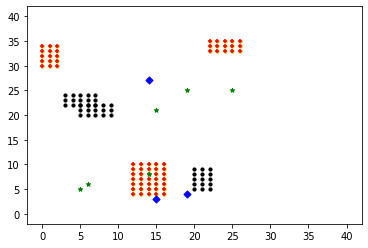

-------------------------------------------------------------------
Candidate 1
No. of new points 35
Number of unCoveredPoints 1581
-------------------------------------------------------------------
Candidate 2
No. of new points 11
Number of unCoveredPoints 1570
-------------------------------------------------------------------
Candidate 3
No. of new points 35
Number of unCoveredPoints 1535


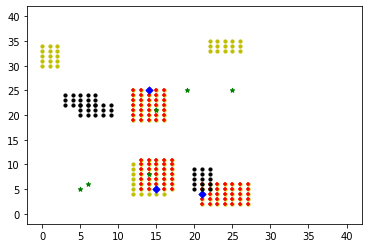

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1525
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1515
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1505


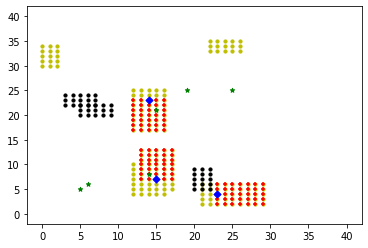

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1495
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1485
-------------------------------------------------------------------
Candidate 3
No. of new points 6
Number of unCoveredPoints 1479


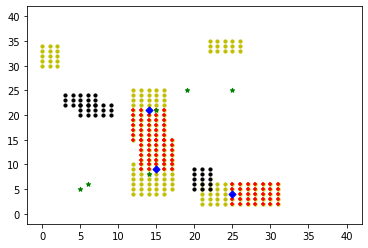

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1469
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 1467
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 1465


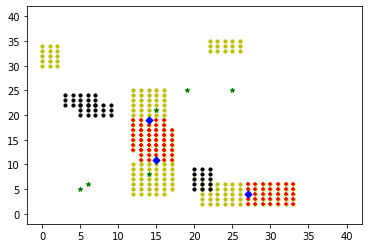

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1455
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 1453
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 1451


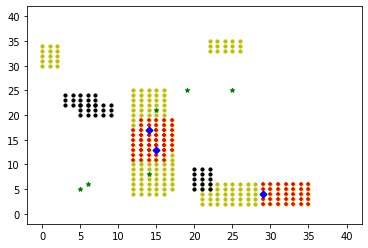

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1441
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 1439
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 1439


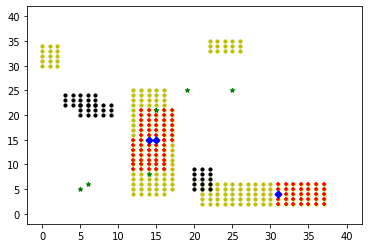

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1429
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 1427
-------------------------------------------------------------------
Candidate 3
No. of new points 25
Number of unCoveredPoints 1402


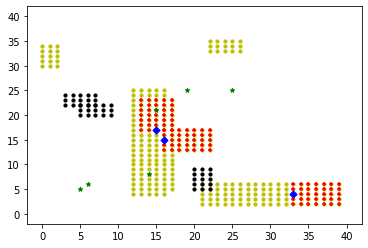

-------------------------------------------------------------------
Candidate 1
No. of new points 5
Number of unCoveredPoints 1397
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 1395
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1385


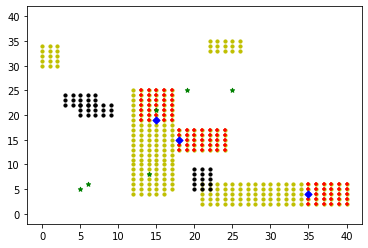

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 1385
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1375
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1365


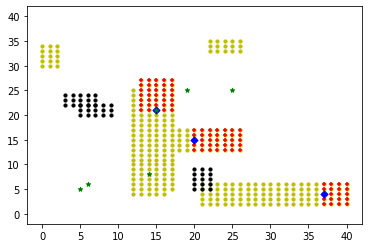

-------------------------------------------------------------------
Candidate 1
No. of new points 30
Number of unCoveredPoints 1335
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1325
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1315


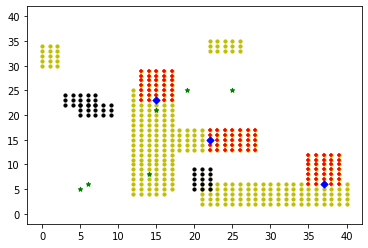

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1305
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1295
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1285


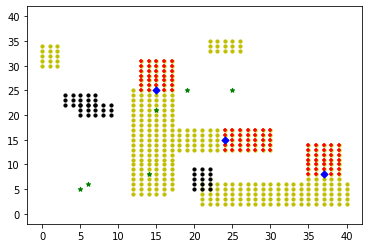

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1275
-------------------------------------------------------------------
Candidate 2
Obstacle Detected
No. of new points 10
Number of unCoveredPoints 1265
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1255


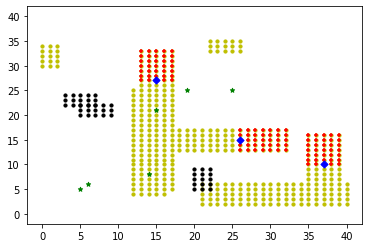

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1245
-------------------------------------------------------------------
Candidate 2
No. of new points 29
Number of unCoveredPoints 1216
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1206


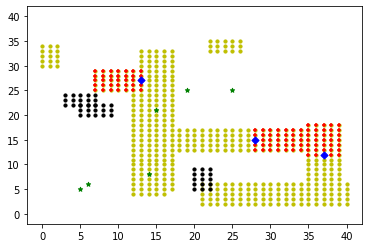

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1196
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1186
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 1186


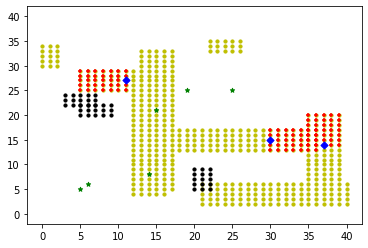

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1176
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1166
-------------------------------------------------------------------
Candidate 3
No. of new points 30
Number of unCoveredPoints 1136


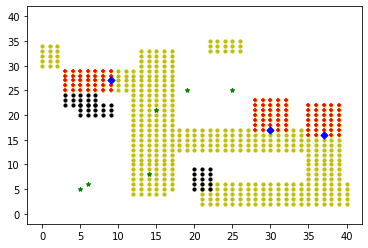

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1126
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 1116
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1106


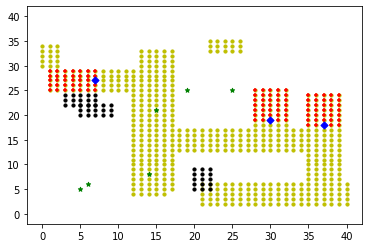

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1096
-------------------------------------------------------------------
Candidate 2
No. of new points 5
Number of unCoveredPoints 1091
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1081


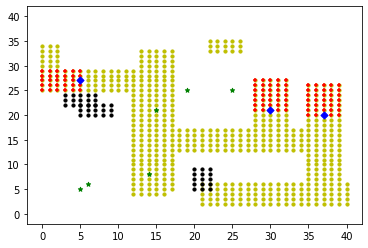

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1071
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 1071
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1061


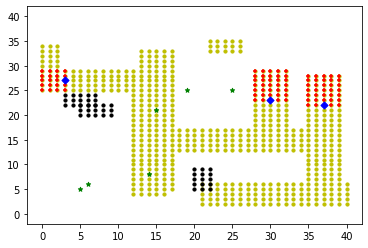

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1051
-------------------------------------------------------------------
Candidate 2
No. of new points 30
Number of unCoveredPoints 1021
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 1011


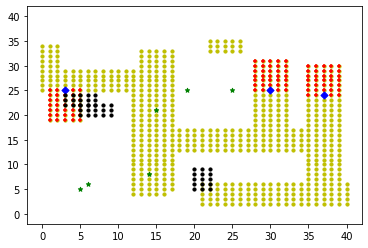

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 1001
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 991
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 981


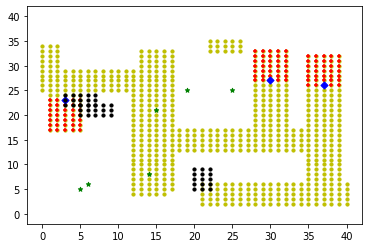

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 971
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 961
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
No. of new points 10
Number of unCoveredPoints 951


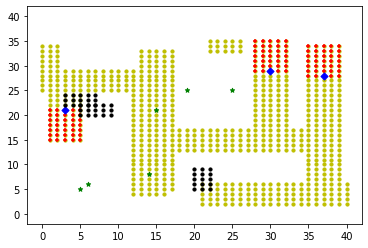

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 941
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 931
-------------------------------------------------------------------
Candidate 3
No. of new points 30
Number of unCoveredPoints 901


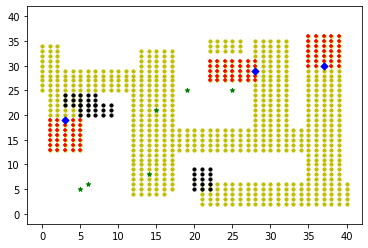

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 891
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 881
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 871


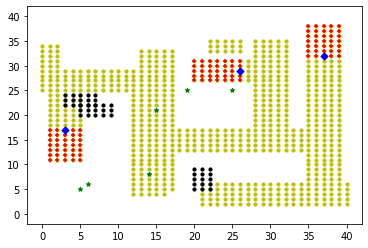

-------------------------------------------------------------------
Candidate 1
No. of new points 10
Number of unCoveredPoints 861
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 851
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 841


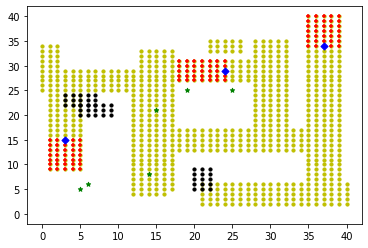

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 841
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 831
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 831


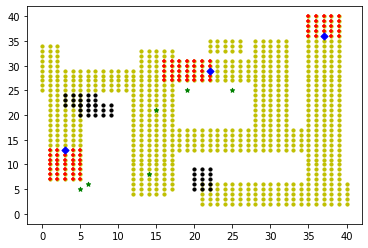

-------------------------------------------------------------------
Candidate 1
No. of new points 22
Number of unCoveredPoints 809
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 799
-------------------------------------------------------------------
Candidate 3
No. of new points 30
Number of unCoveredPoints 769


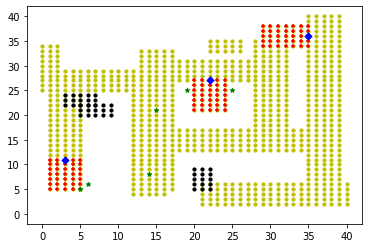

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 8
Number of unCoveredPoints 761
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 751
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 741


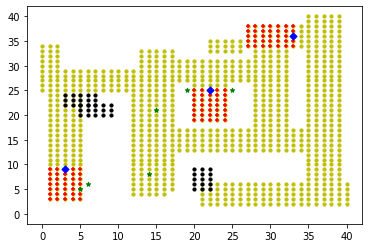

-------------------------------------------------------------------
Candidate 1
No. of new points 12
Number of unCoveredPoints 729
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 719
-------------------------------------------------------------------
Candidate 3
No. of new points 5
Number of unCoveredPoints 714


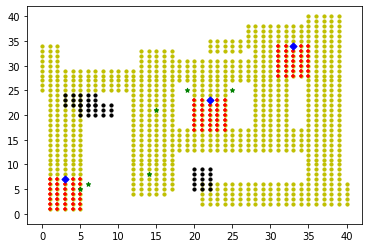

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 710
-------------------------------------------------------------------
Candidate 2
No. of new points 5
Number of unCoveredPoints 705
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 705


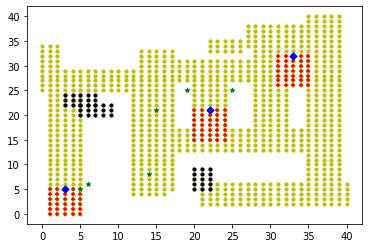

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 701
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 701
-------------------------------------------------------------------
Candidate 3
No. of new points 15
Number of unCoveredPoints 686


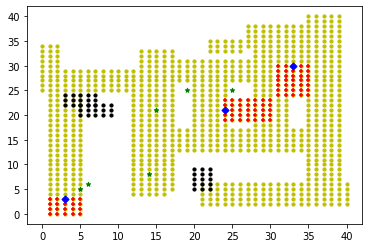

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 682
-------------------------------------------------------------------
Candidate 2
No. of new points 30
Number of unCoveredPoints 652
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 652


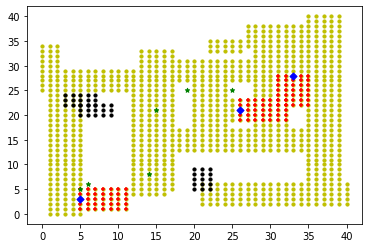

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 648
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 642
-------------------------------------------------------------------
Candidate 3
No. of new points 9
Number of unCoveredPoints 633


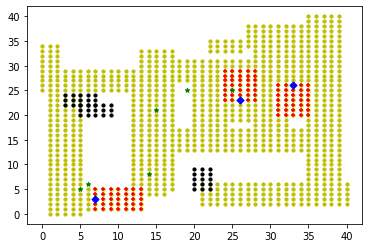

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 629
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 623
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 623


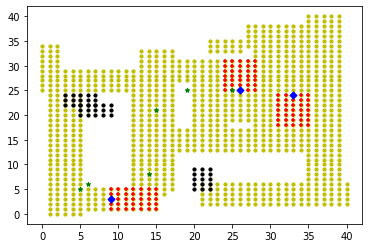

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 623
-------------------------------------------------------------------
Candidate 2
No. of new points 7
Number of unCoveredPoints 616
-------------------------------------------------------------------
Candidate 3
No. of new points 8
Number of unCoveredPoints 608


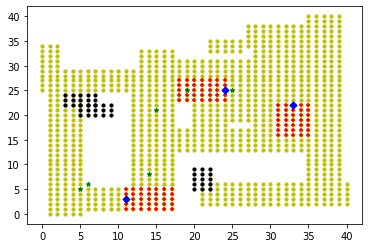

-------------------------------------------------------------------
Candidate 1
No. of new points 5
Number of unCoveredPoints 603
-------------------------------------------------------------------
Candidate 2
Pertubation done
No. of new points 10
Number of unCoveredPoints 593
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 593


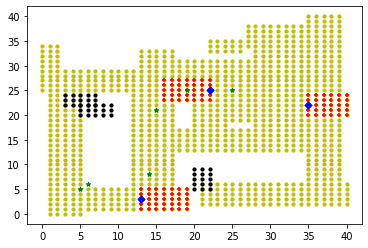

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 593
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 593
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 593


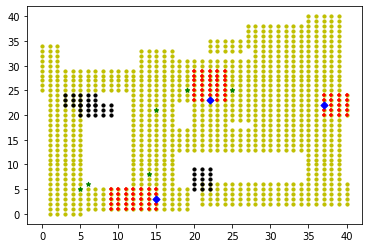

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 593
-------------------------------------------------------------------
Candidate 2
Pertubation done
No. of new points 5
Number of unCoveredPoints 588
-------------------------------------------------------------------
Candidate 3
No. of new points 4
Number of unCoveredPoints 584


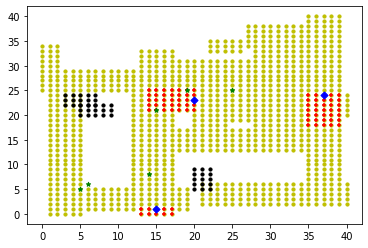

-------------------------------------------------------------------
Candidate 1
Pertubation done
No. of new points 2
Number of unCoveredPoints 582
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 582
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 582


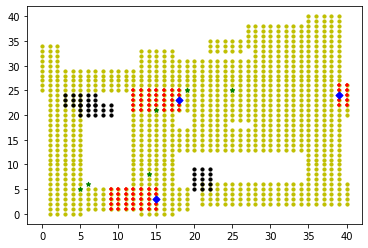

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 582
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 582
-------------------------------------------------------------------
Candidate 3
No. of new points 6
Number of unCoveredPoints 576


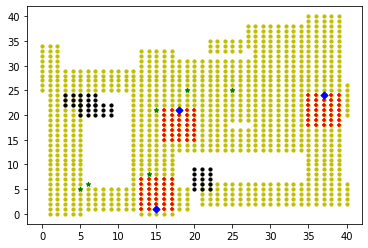

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 576
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 570
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 570


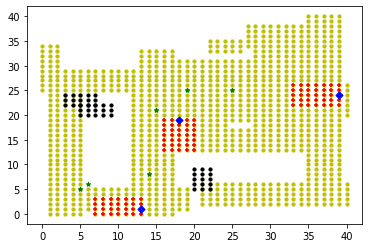

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 566
-------------------------------------------------------------------
Candidate 2
No. of new points 1
Number of unCoveredPoints 565
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 563


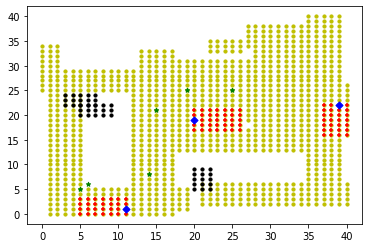

-------------------------------------------------------------------
Candidate 1
No. of new points 2
Number of unCoveredPoints 561
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 561
-------------------------------------------------------------------
Candidate 3
No. of new points 1
Number of unCoveredPoints 560


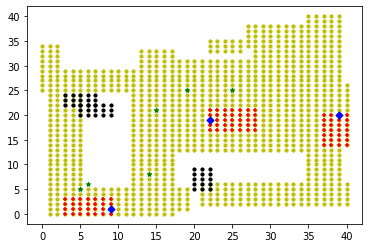

-------------------------------------------------------------------
Candidate 1
No. of new points 2
Number of unCoveredPoints 558
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 558
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 558


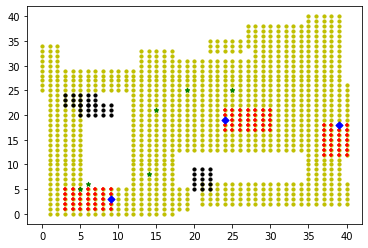

-------------------------------------------------------------------
Candidate 1
No. of new points 2
Number of unCoveredPoints 556
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 556
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 556


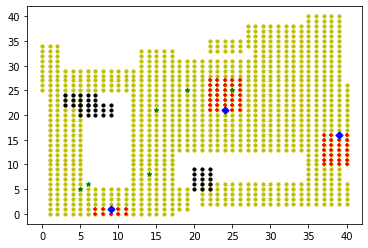

-------------------------------------------------------------------
Candidate 1
No. of new points 2
Number of unCoveredPoints 554
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 554
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 554


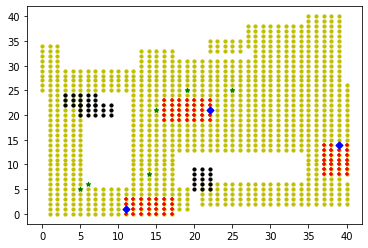

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 553
-------------------------------------------------------------------
Candidate 2
No. of new points 12
Number of unCoveredPoints 541
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 541


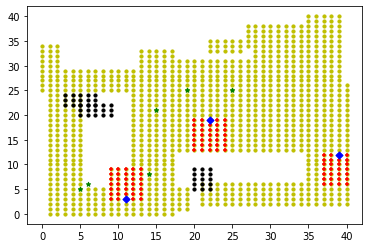

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 541
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 535
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 535


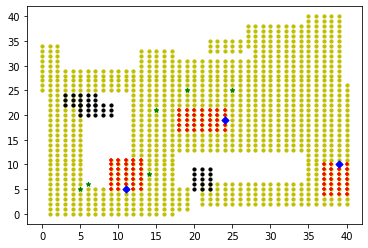

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 535
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 529
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 519


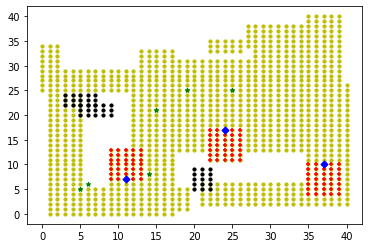

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 519
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 513
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 503


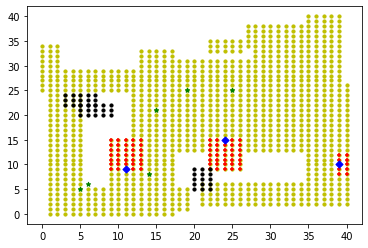

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 503
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 497
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 487


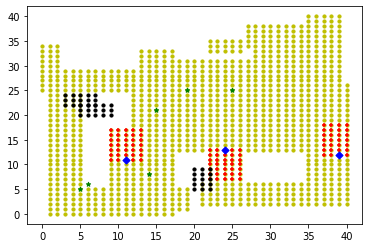

-------------------------------------------------------------------
Candidate 1
No. of new points 12
Number of unCoveredPoints 475
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 469
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 469


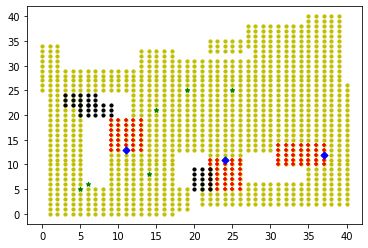

-------------------------------------------------------------------
Candidate 1
No. of new points 6
Number of unCoveredPoints 463
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 457
-------------------------------------------------------------------
Candidate 3
No. of new points 12
Number of unCoveredPoints 445


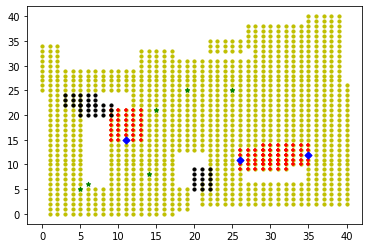

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 445
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 439
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 437


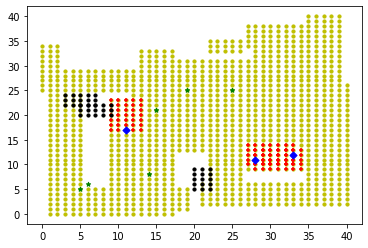

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 8
Number of unCoveredPoints 429
-------------------------------------------------------------------
Candidate 2
No. of new points 3
Number of unCoveredPoints 426
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 426


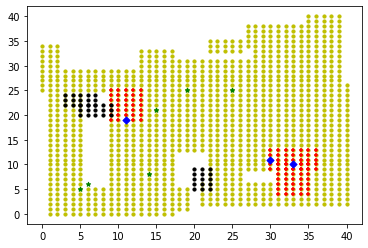

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 426
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 426
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 426


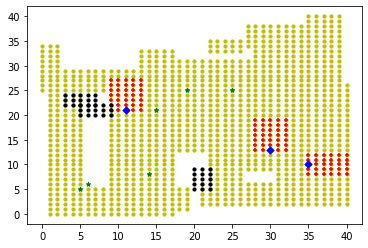

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 426
-------------------------------------------------------------------
Candidate 2
No. of new points 15
Number of unCoveredPoints 411
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 411


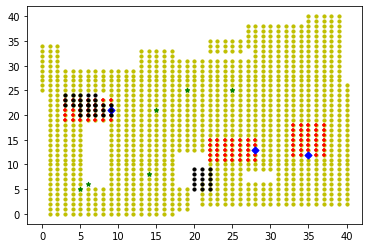

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 411
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 411
-------------------------------------------------------------------
Candidate 3
No. of new points 8
Number of unCoveredPoints 403


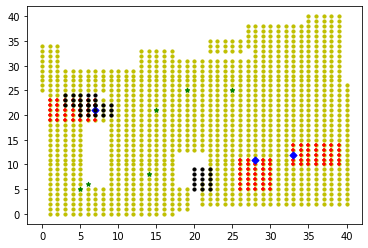

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 403
-------------------------------------------------------------------
Candidate 2
No. of new points 18
Number of unCoveredPoints 385
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 385


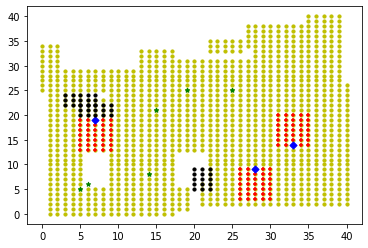

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 385
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 379
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 379


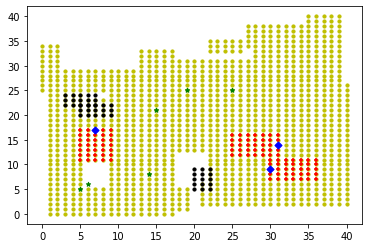

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 379
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 373
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 373


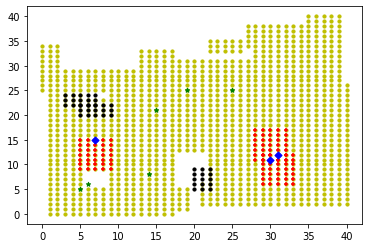

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 373
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 367
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 367


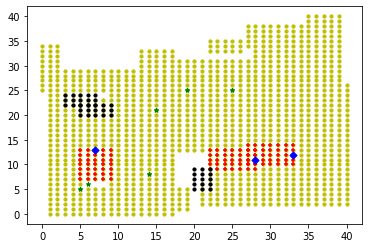

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 367
-------------------------------------------------------------------
Candidate 2
No. of new points 3
Number of unCoveredPoints 364
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 364


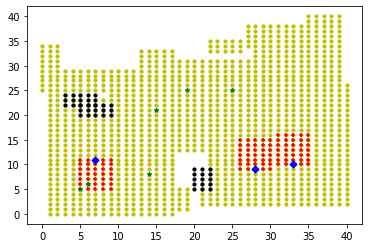

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 364
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 364
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 354


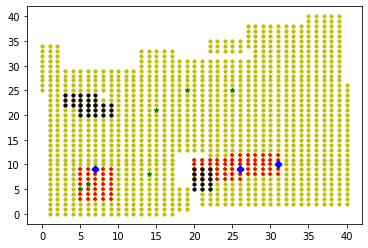

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 354
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 354
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 344


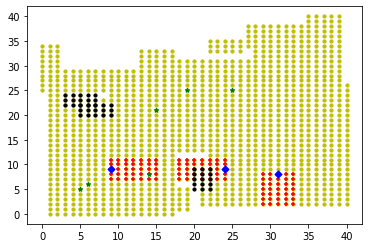

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 344
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 344
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 344


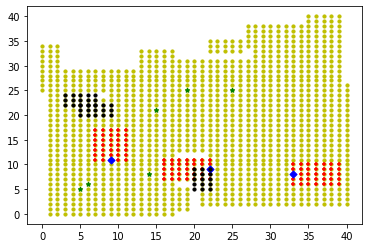

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 344
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 344
-------------------------------------------------------------------
Candidate 3
No. of new points 10
Number of unCoveredPoints 334


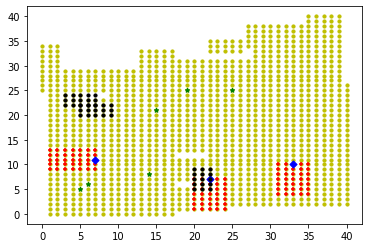

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 334
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 334
-------------------------------------------------------------------
Candidate 3
No. of new points 5
Number of unCoveredPoints 329


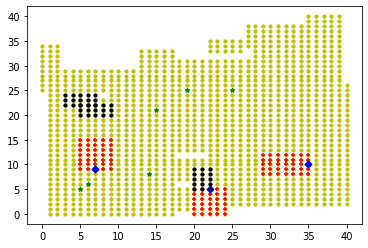

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 329
-------------------------------------------------------------------
Candidate 2
No. of new points 5
Number of unCoveredPoints 324
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 324


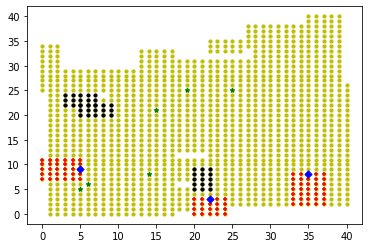

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 324
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 324
-------------------------------------------------------------------
Candidate 3
No. of new points 6
Number of unCoveredPoints 318


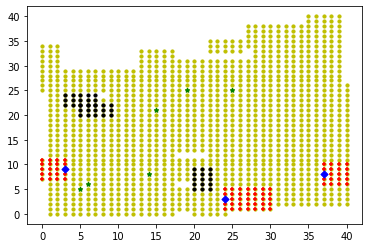

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 318
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 318
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 316


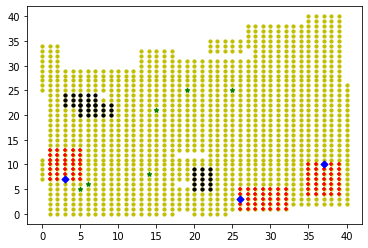

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 316
-------------------------------------------------------------------
Candidate 2
Pertubation done
No. of new points 2
Number of unCoveredPoints 314
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 312


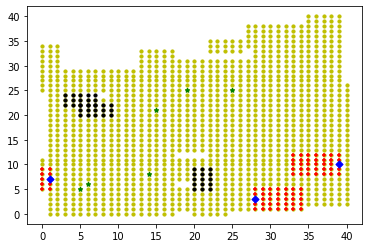

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 312
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 312
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 310


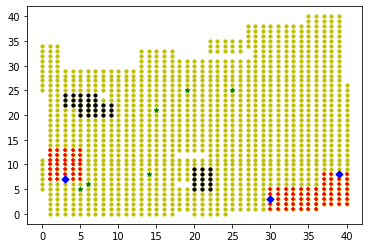

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 310
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 310
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 308


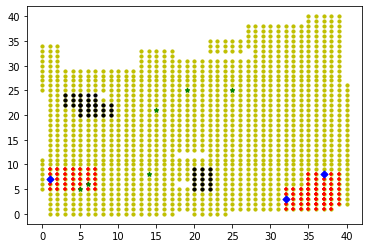

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 308
-------------------------------------------------------------------
Candidate 2
No. of new points 4
Number of unCoveredPoints 304
-------------------------------------------------------------------
Candidate 3
No. of new points 2
Number of unCoveredPoints 302


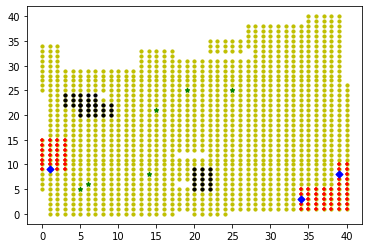

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 302
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 300
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 300


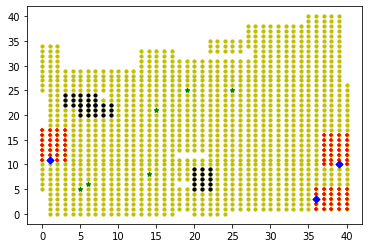

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 300
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 298
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 298


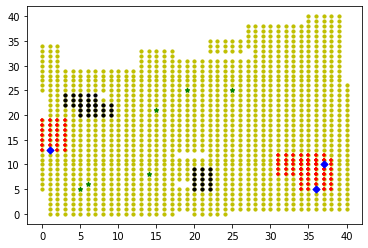

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 298
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 296
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 296


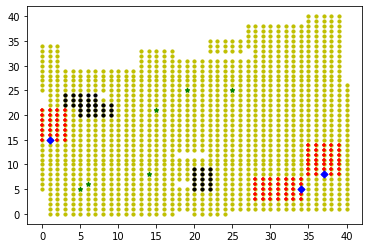

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 296
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 294
-------------------------------------------------------------------
Candidate 3
No. of new points 5
Number of unCoveredPoints 289


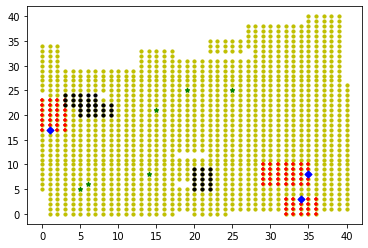

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 288
-------------------------------------------------------------------
Candidate 2
No. of new points 1
Number of unCoveredPoints 287
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 287


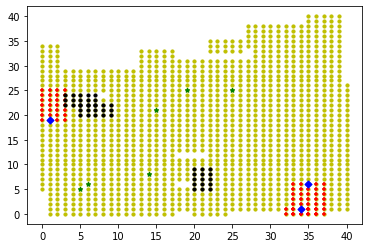

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 287
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 287
-------------------------------------------------------------------
Candidate 3
No. of new points 3
Number of unCoveredPoints 284


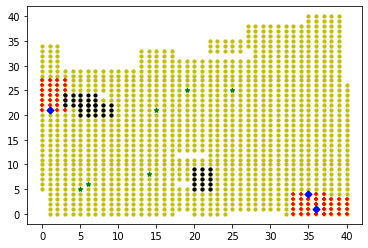

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 284


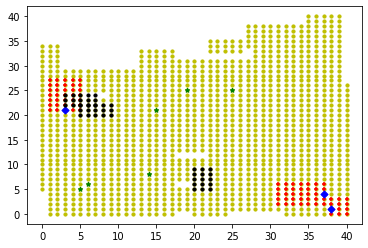

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 284


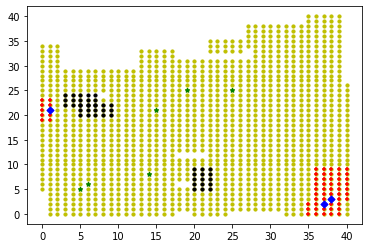

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 284


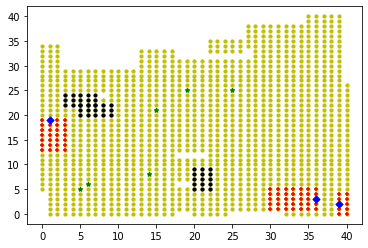

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 284


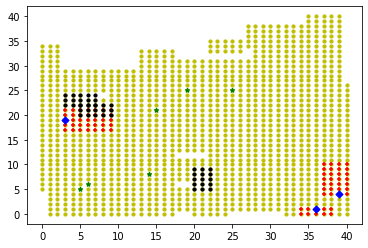

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 284


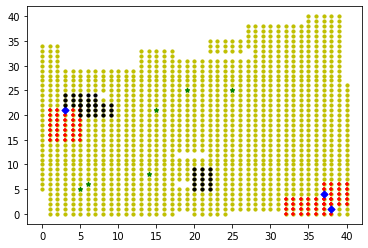

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 284


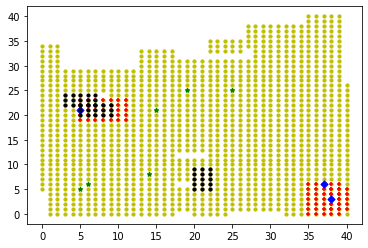

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 284
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 282
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 282


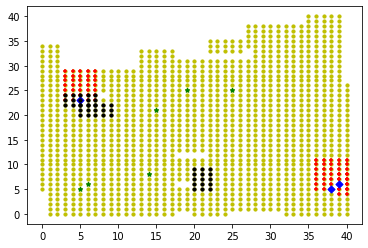

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 282
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 272
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 272


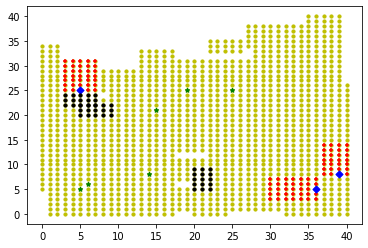

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 272
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 262
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 262


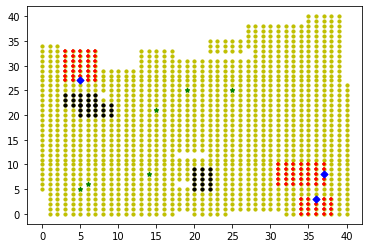

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 262
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 252
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 252


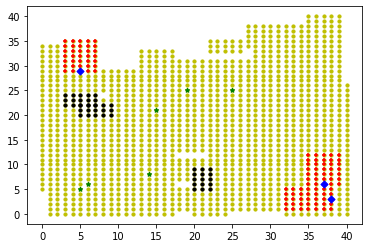

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 252
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 242
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 242


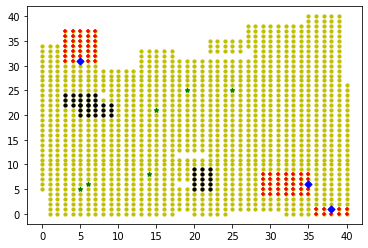

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 242
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 232
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 232


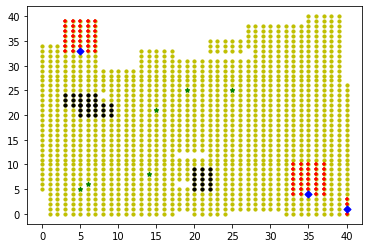

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 232
-------------------------------------------------------------------
Candidate 2
No. of new points 5
Number of unCoveredPoints 227
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 227


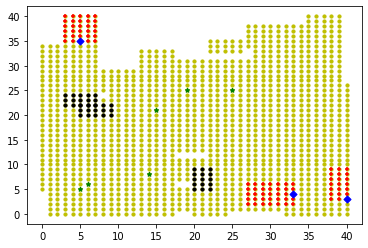

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 226
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 226
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 226


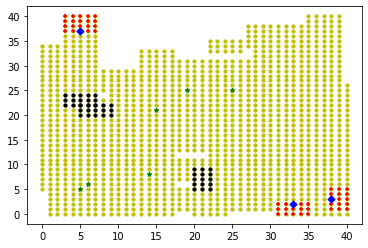

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 226
-------------------------------------------------------------------
Candidate 2
No. of new points 15
Number of unCoveredPoints 211
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 211


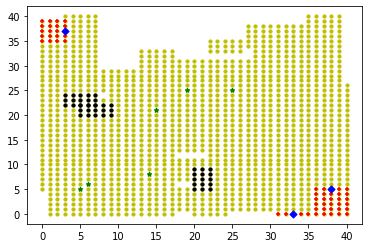

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 211
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 211
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 211


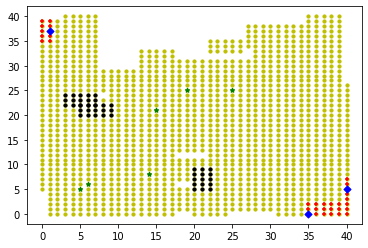

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 211
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 211
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 211


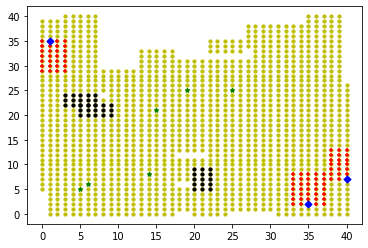

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 207
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 197
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 197


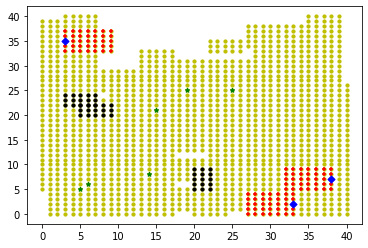

-------------------------------------------------------------------
Candidate 1
No. of new points 2
Number of unCoveredPoints 195
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 185
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 185


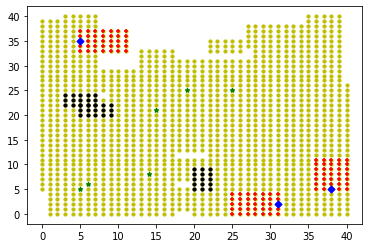

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 185
-------------------------------------------------------------------
Candidate 2
No. of new points 9
Number of unCoveredPoints 176
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 176


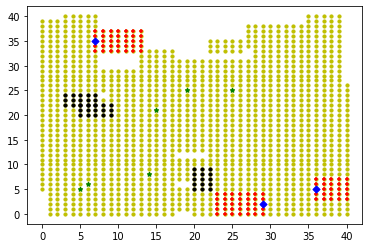

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 176
-------------------------------------------------------------------
Candidate 2
No. of new points 8
Number of unCoveredPoints 168
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 168


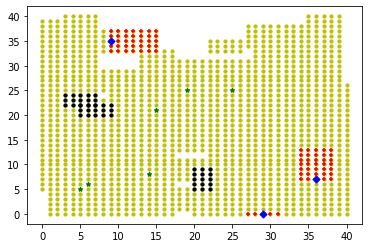

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 168
-------------------------------------------------------------------
Candidate 2
No. of new points 8
Number of unCoveredPoints 160
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 160


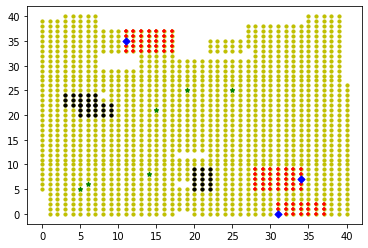

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 160
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 150
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 150


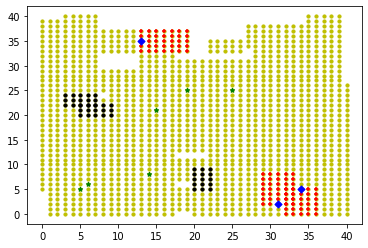

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 150
-------------------------------------------------------------------
Candidate 2
No. of new points 10
Number of unCoveredPoints 140
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 140


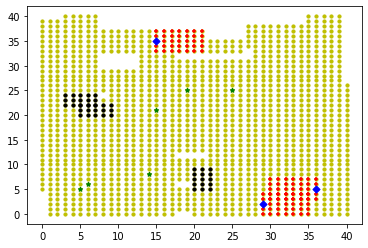

-------------------------------------------------------------------
Candidate 1
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 140
-------------------------------------------------------------------
Candidate 2
No. of new points 4
Number of unCoveredPoints 136
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 136


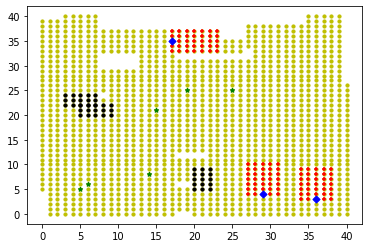

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 136
-------------------------------------------------------------------
Candidate 2
No. of new points 4
Number of unCoveredPoints 132
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 132


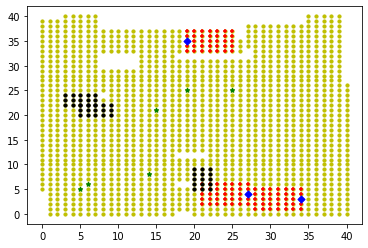

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 132
-------------------------------------------------------------------
Candidate 2
No. of new points 3
Number of unCoveredPoints 129
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 129


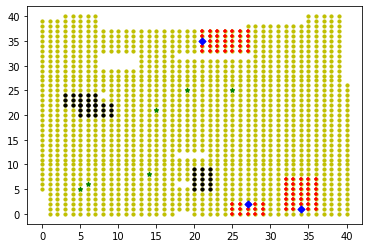

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 129
-------------------------------------------------------------------
Candidate 2
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 129
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 129


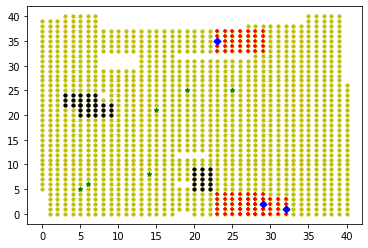

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 129
-------------------------------------------------------------------
Candidate 2
No. of new points 15
Number of unCoveredPoints 114
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 114


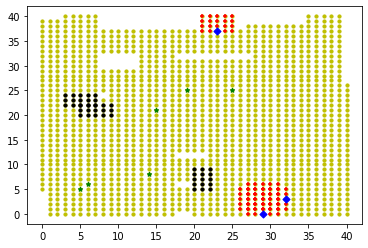

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 114
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 114
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 114


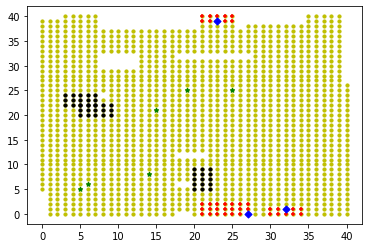

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 114
-------------------------------------------------------------------
Candidate 2
No. of new points 18
Number of unCoveredPoints 96
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 96


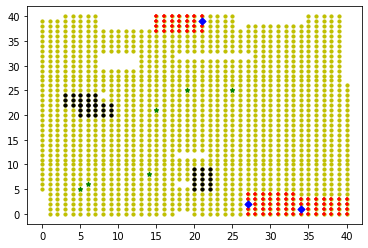

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 96
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 90
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 90


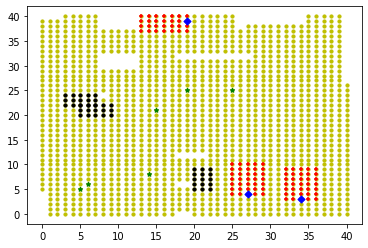

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 89
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 83
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 83


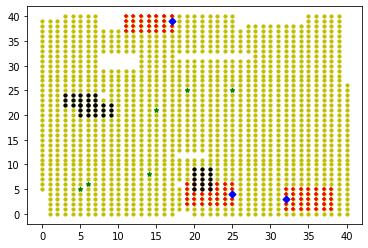

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 82
-------------------------------------------------------------------
Candidate 2
No. of new points 6
Number of unCoveredPoints 76
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 76


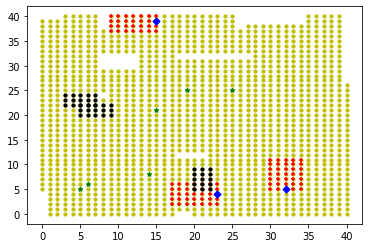

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 76
-------------------------------------------------------------------
Candidate 2
No. of new points 3
Number of unCoveredPoints 73
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 73


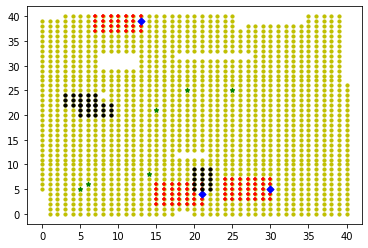

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 72
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 72
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 72


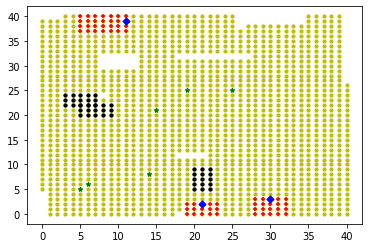

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 72
-------------------------------------------------------------------
Candidate 2
No. of new points 8
Number of unCoveredPoints 64
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 64


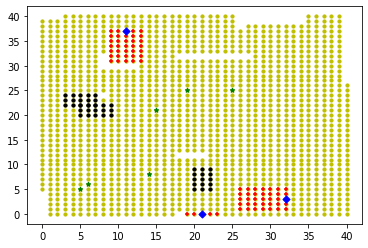

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 64
-------------------------------------------------------------------
Candidate 2
No. of new points 4
Number of unCoveredPoints 60
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 60


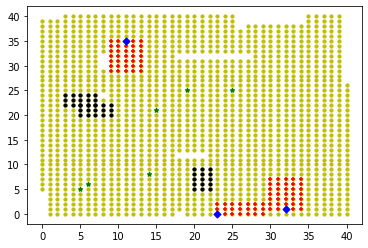

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 60
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 60
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 60


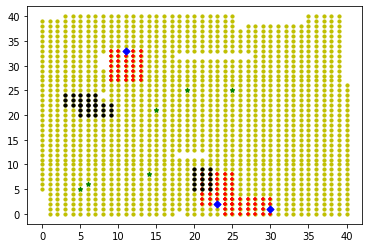

-------------------------------------------------------------------
Candidate 1
No. of new points 1
Number of unCoveredPoints 59
-------------------------------------------------------------------
Candidate 2
Obstacle Detected
No. of new points 2
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 57


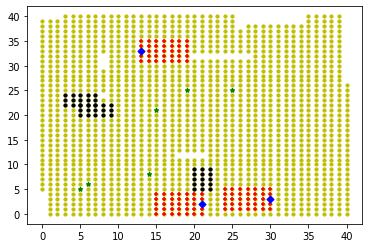

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 57


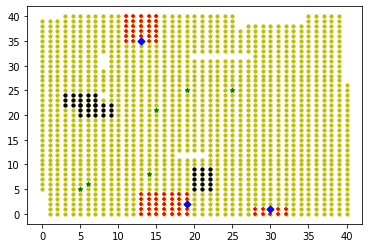

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 57


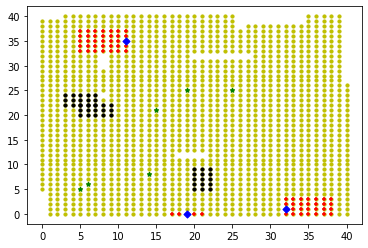

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 57


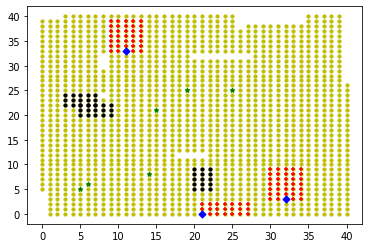

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 57
-------------------------------------------------------------------
Candidate 2
No. of new points 2
Number of unCoveredPoints 55
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 55


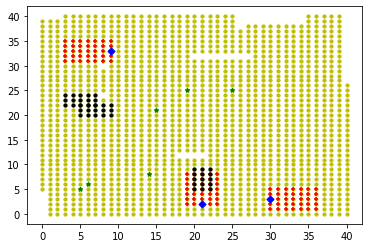

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 55
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 55
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 55


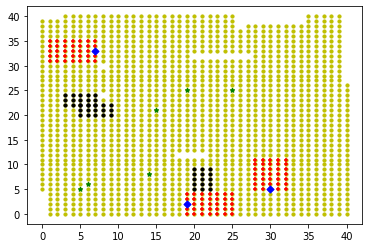

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 55
-------------------------------------------------------------------
Candidate 2
No. of new points 1
Number of unCoveredPoints 54
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 54


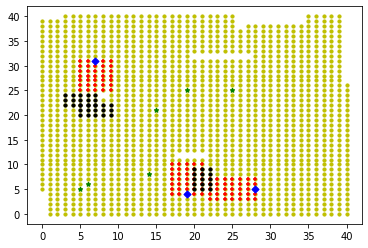

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 54
-------------------------------------------------------------------
Candidate 2
No. of new points 1
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


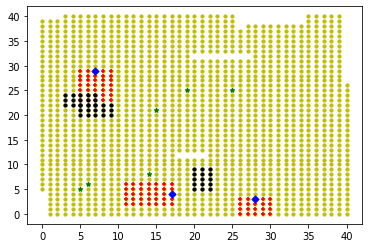

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


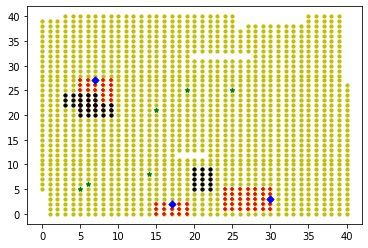

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


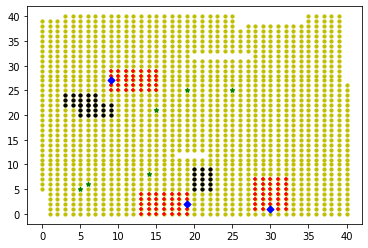

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


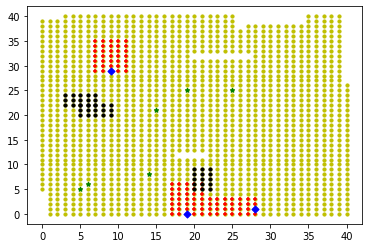

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


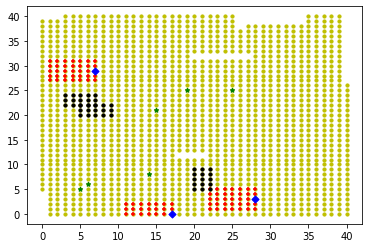

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


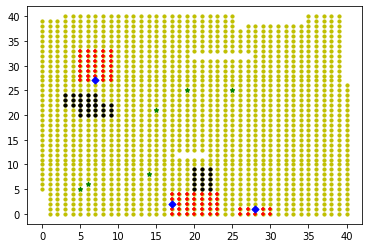

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


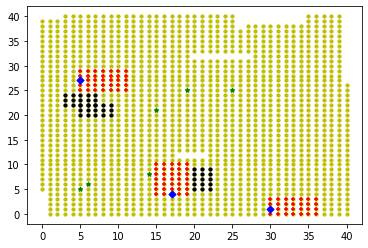

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Obstacle Detected
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


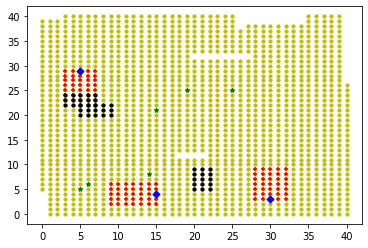

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


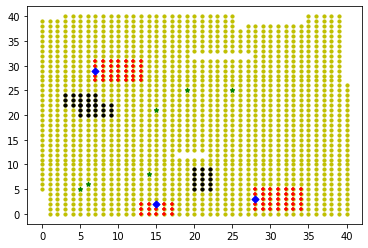

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


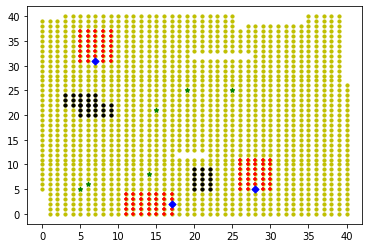

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


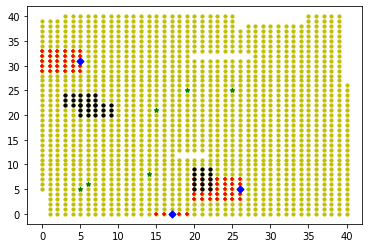

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


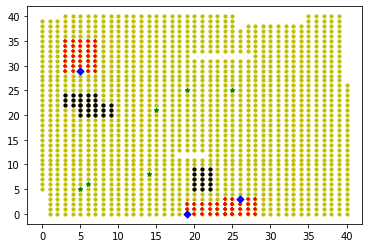

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


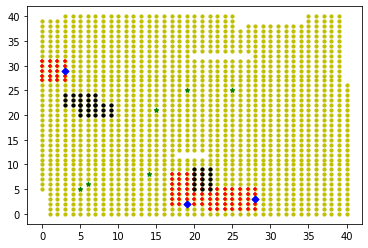

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


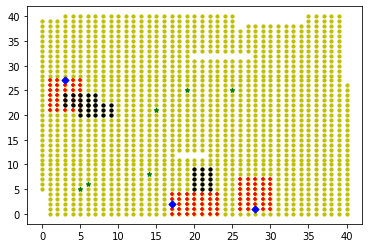

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


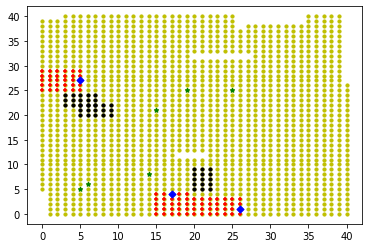

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


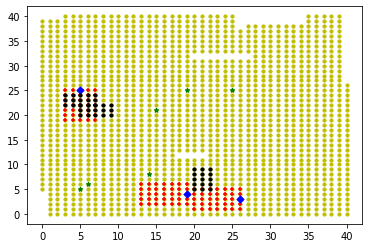

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


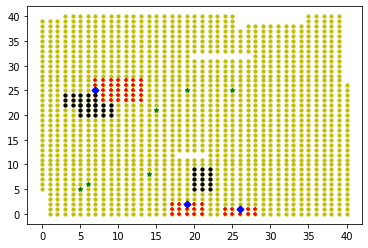

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


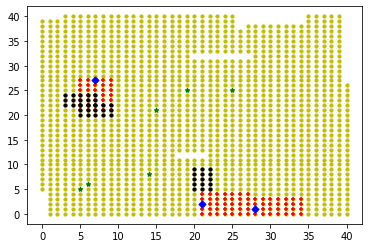

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 53


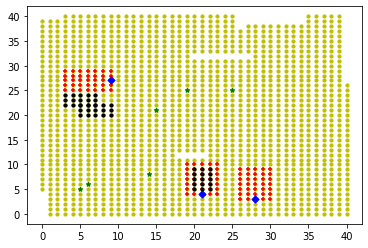

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 53
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 53


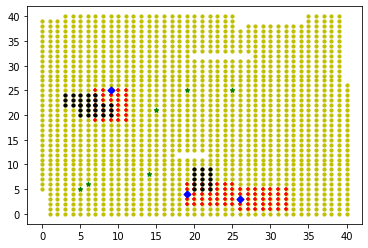

-------------------------------------------------------------------
Candidate 1
No. of new points 4
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


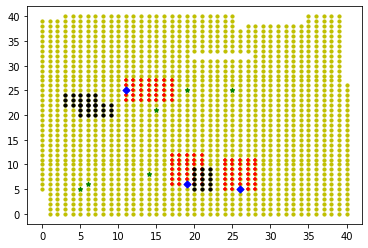

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


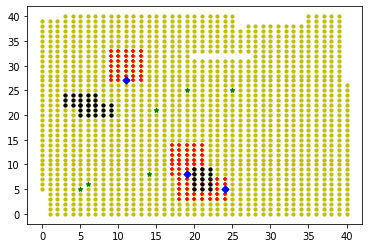

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


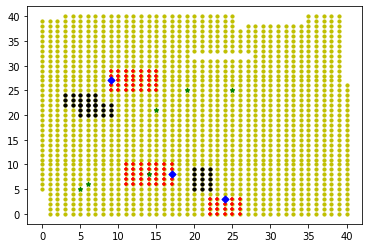

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


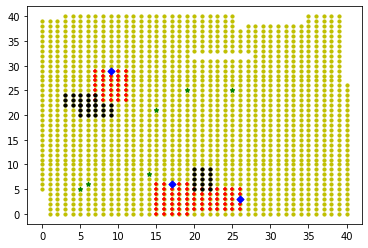

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Obstacle Detected
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


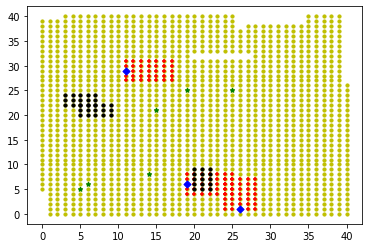

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


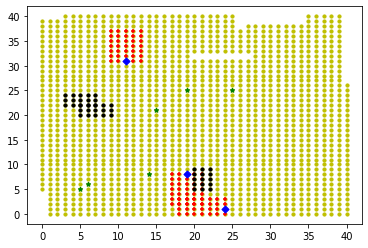

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


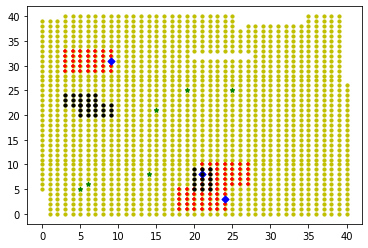

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


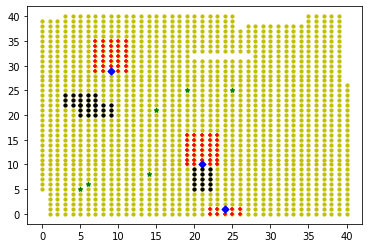

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


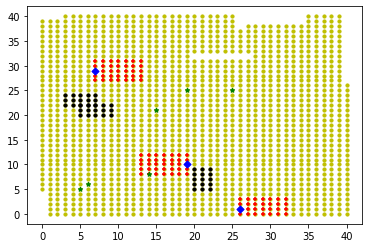

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


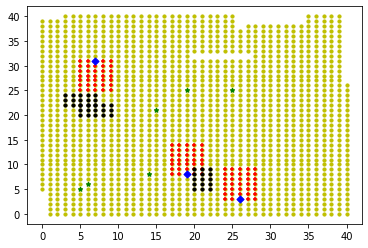

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


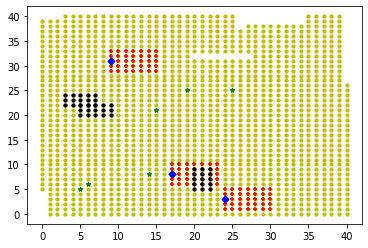

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


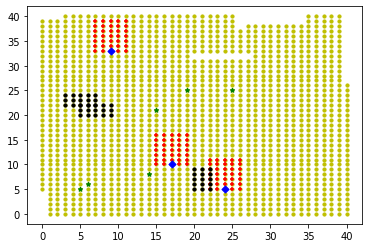

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


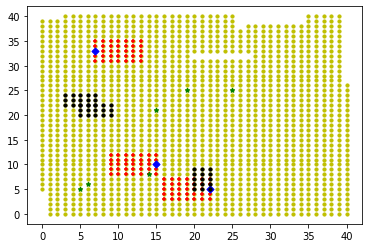

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


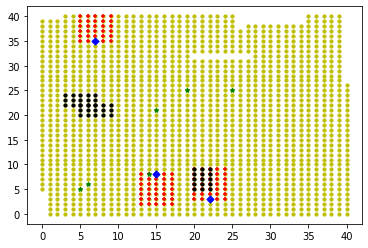

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


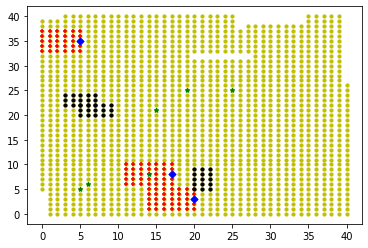

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


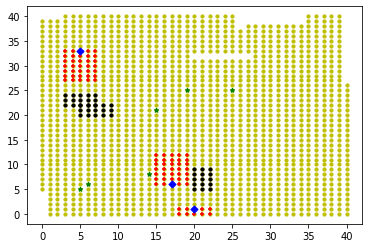

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


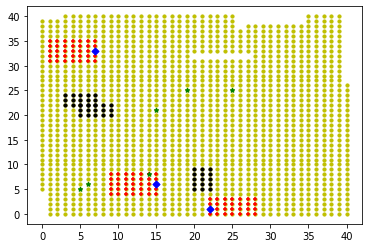

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


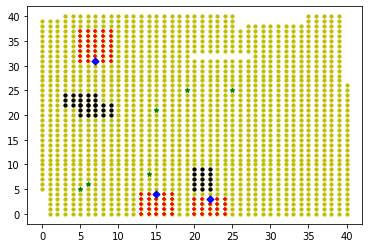

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


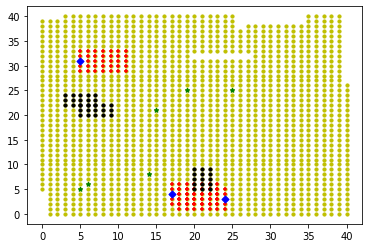

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


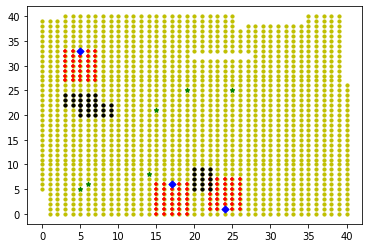

-------------------------------------------------------------------
Candidate 1
Covering same area
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


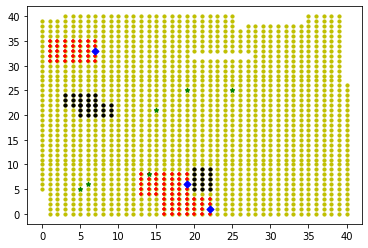

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


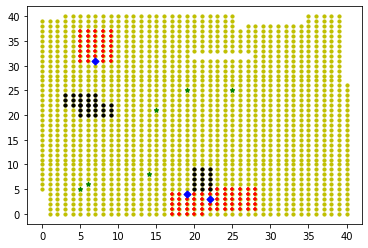

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


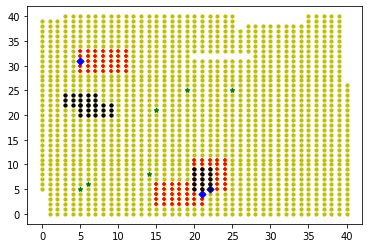

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


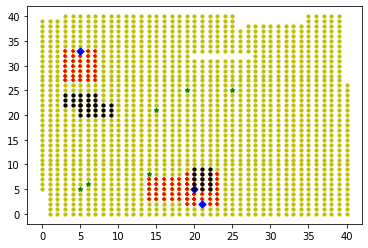

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


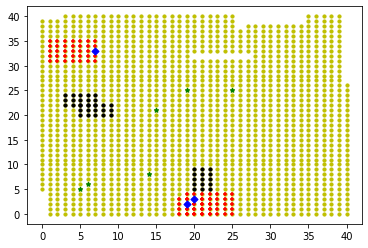

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


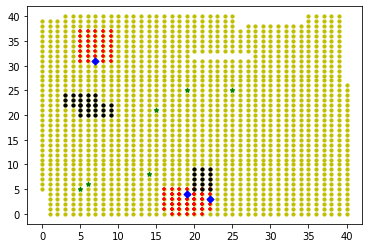

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


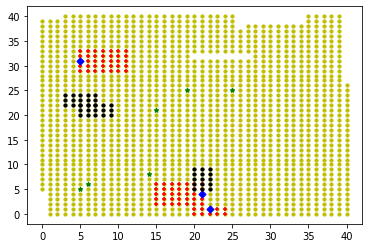

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
No. of new points 0
Number of unCoveredPoints 49


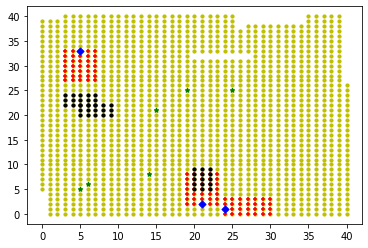

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


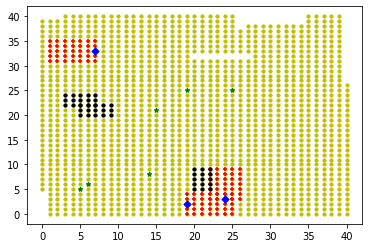

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49


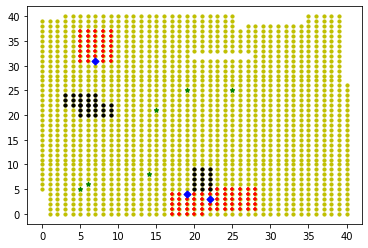

-------------------------------------------------------------------
Candidate 1
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 2
Covering same area
Pertubation done
No. of new points 0
Number of unCoveredPoints 49
-------------------------------------------------------------------
Candidate 3
Covering same area
Due to Counter 
Done in 178


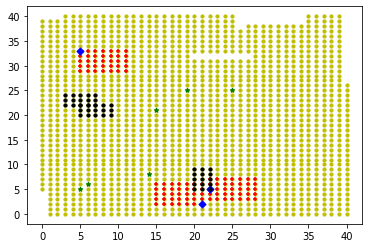

In [ ]:
singleChange = 0
counter = 0
obsChange = 0
for iteration in range((length+breadth*4)+50):
  x1 = [[] for i in range(n_cand)]
  y1 = [[] for i in range(n_cand)]
  for b in range(n_cand):
    if (len(unCoveredPoints)>0):
      print("-------------------------------------------------------------------")
      print("Candidate" , b+1)
      c = allBotCurrConf[b]
      # print("prev", prev)
      totalAllBotConf[b].append(c[:])
      # print("Before Pos", b , c)
      shieldPoints =getShieldPoints(bot_safe_bounding(c,length,breadth))
      # print(shieldPoints)
      before = len(unCoveredPoints)

      visionRectPoints = getVisionRectPoints(allBotVisionrect[b])
      x1[b],y1[b] = displayVData(visionRectPoints)

      for t in visionRectPoints:
          totalVisionPoints.append(t)
      totalVisionPoints = removeDuplicates(totalVisionPoints)

      #Function call for Interest point detection
      detect_points(totalVisionPoints,interest_points)

      unCoveredPoints = [elem for elem in unCoveredPoints if elem not in visionRectPoints]
      after  = len(unCoveredPoints)

      # Function Call for Obstacle detection
      c,obsChange = detect_Obstacle(c,shieldPoints,allObstaclePoints,obsChange)

      # Function Call for Covering Same Area
      if obsChange == 0:
        c,counter,singleChange = coveringSameArea(c,singleChange,before,after,counter)
      if counter>(n_cand*n_cand*10):
        allBotCurrConf[b] = c
        allBotVisionrect[b] = bounding(c,length,breadth)
        visionRectPoints = getVisionRectPoints(allBotVisionrect[b])
        x1[b],y1[b] = displayVData(visionRectPoints)
        print("Due to Counter ")
        print("Done in" ,iteration+1)
        break

      # Function Call for Less Vision
      if singleChange == 0:
        c = lessVision(c,len(visionRectPoints))
      # Function Call for Bot Movement
      c = botMovement(c,length,breadth)

      # Function Call for Bot Pertubation
      c = pertubation(c,totalAllBotConf[b])

      # print("New Pos", b , c)
      allBotCurrConf[b] = c

      # Function Call for Bot's Vision Rectangle
      allBotVisionrect[b] = bounding(c,length,breadth)

      print("No. of new points" , before-after)
      print("Number of unCoveredPoints",len(unCoveredPoints))

    else:
      print("Done in" ,iteration+1)
      break
  else:
    prev = []
    for f in range(n_cand):
      prev.append(totalAllBotConf[f][iteration])
    detect_points(totalVisionPoints,interest_points)
    display(n_cand,xo,yo,totalVisionPoints,prev,x1,y1,interest_points,length,breadth)
    continue
  break
display(n_cand,xo,yo,totalVisionPoints,allBotCurrConf,x1,y1,interest_points,length,breadth)

In [ ]:
# allBotCurrConf = [[13, 11, 90, 0], [8, 11, 0, 0]]
# allBotVisionrect  = [[(11, 11), (11, 15), (15, 15), (15, 11), 90], [(8, 13), (14, 13), (14, 9), (8, 9), 0]]
# unCoveredPoints = totalPoints
# totalVisionPoints = []
# totalAllBotConf=[[[13, 11, 90, 0]], [[8, 11, 0, 0]]]

In [ ]:
def displayBot(n_cand,xo,yo,c,l,b):
  fig = plt.figure()
  ax1 = fig.add_subplot()
  x=[]
  y=[]
  print(c)
  for j in c:
    x.append(j[0])
    y.append(j[1])

  ax1.scatter(x, y,marker="D" , s = 45, c = 'r')
  ax1.scatter(xo,yo,s =10 , c='k')
  plt.xlim([-2, length+2])
  plt.ylim([-2, breadth+2])
  plt.show()

In [ ]:
def botExitMovement(c,l,b):
  if c[-2] == 0:
      check= c[0]+1
      if check > l:
        c[-1]=1
        c = angleMovement(c)
        c[0]=c[0]-1
      else:
        c[0]=c[0]+1
  elif c[-2]==90:
      check= c[1]+1
      if check > b:
        c[-1]=1
        c = angleMovement(c)
        c[1]=c[1]-1
      else:
        c[1]=c[1]+1
  elif c[-2]==180:
      check= c[0]-1
      if check < 0:
        c[-1]=1
        c = angleMovement(c)
        c[0]=c[0]
      else:
        c[0]=c[0]-1
  else:
      check= c[1]-1
      if check < 0:
        c[-1]=1
        c = angleMovement(c)
        c[1]=c[1]
      else:
        c[1]=c[1]-1
  c[-1] = 0
  return c

In [ ]:
allBotPos=prev
# allBotPos =[[9, 38, 0, 1],[19, 38, 270, 1],[10, 31, 180, 0]]
smin=[]     #(x+y distance of each candidate)
allBotS=[]
flag=[]     # terminate the candidate if it reaches the exit

for t in range(n_cand):
  smin.append(allBotPos[t][0]+allBotPos[t][1])
  allBotS.append([allBotPos[t][0]+allBotPos[t][1]])
  flag.append(0)

In [ ]:
totalAllBotPos = [[] for i in range(n_cand)]

In [ ]:
def exit_detect_Obstacle(c,shieldPoints,allObstaclePoints,obsChange):
  obsDetect = any(sp in allObstaclePoints for sp in shieldPoints)
  if obsDetect:
    c[-1] =1
    if c[-2] == 270:
      c= angleMovement(c)
      c= angleMovement(c)
      c= angleMovement(c)
    else:
      c = angleMovement(c)
    # c=botExitMovement(c,length,breadth)
    obsChange = 1
  else:
    obsChange = 0
  return c,obsChange

-------------------------------------------------------------------
Candidate 1
s(distance): 1 23
After movement of candidate:  [19, 3, 270, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 38
After movement of candidate:  [7, 32, 90, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 25
After movement of candidate:  [23, 3, 0, 0]
[[19, 4, 270, 1], [7, 31, 90, 1], [22, 3, 0, 1]]


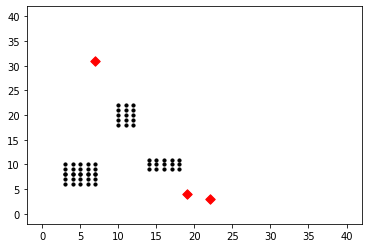

-------------------------------------------------------------------
Candidate 1
s(distance): 1 22
After movement of candidate:  [19, 2, 270, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 39
After movement of candidate:  [6, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 26
After movement of candidate:  [23, 4, 90, 0]
[[19, 3, 270, 0], [7, 32, 90, 0], [23, 3, 0, 0]]


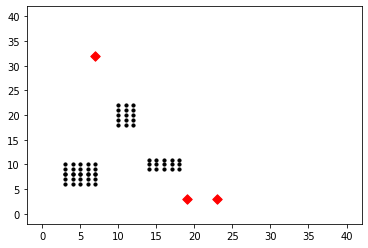

-------------------------------------------------------------------
Candidate 1
s(distance): 1 21
After movement of candidate:  [19, 1, 270, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 38
After movement of candidate:  [5, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 27
After movement of candidate:  [22, 4, 180, 0]
[[19, 2, 270, 0], [6, 32, 180, 0], [23, 4, 90, 0]]


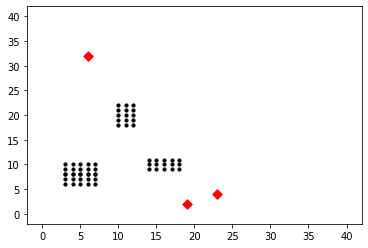

-------------------------------------------------------------------
Candidate 1
s(distance): 1 20
After movement of candidate:  [19, 0, 270, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 37
After movement of candidate:  [4, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 26
After movement of candidate:  [22, 3, 270, 0]
[[19, 1, 270, 0], [5, 32, 180, 0], [22, 4, 180, 0]]


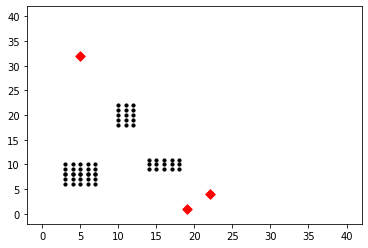

-------------------------------------------------------------------
Candidate 1
s(distance): 1 19
After movement of candidate:  [19, 0, 0, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 36
After movement of candidate:  [3, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 25
After movement of candidate:  [22, 2, 270, 0]
[[19, 0, 270, 0], [4, 32, 180, 0], [22, 3, 270, 0]]


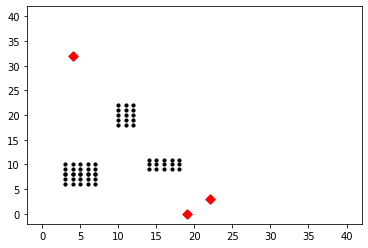

-------------------------------------------------------------------
Candidate 1
s(distance): 1 19
After movement of candidate:  [20, 0, 0, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 35
After movement of candidate:  [2, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 24
After movement of candidate:  [22, 1, 270, 0]
[[19, 0, 0, 0], [3, 32, 180, 0], [22, 2, 270, 0]]


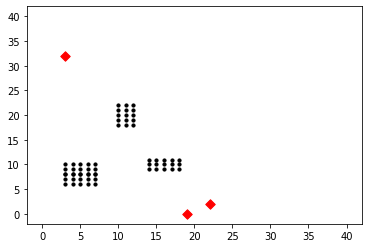

-------------------------------------------------------------------
Candidate 1
s(distance): 1 20
After movement of candidate:  [20, 1, 90, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 34
After movement of candidate:  [1, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 23
After movement of candidate:  [22, 0, 270, 0]
[[20, 0, 0, 0], [2, 32, 180, 0], [22, 1, 270, 0]]


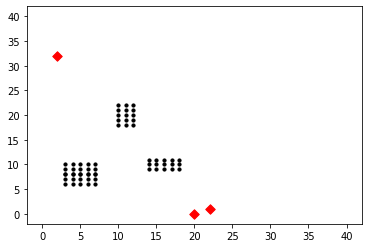

-------------------------------------------------------------------
Candidate 1
s(distance): 1 21
After movement of candidate:  [19, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 33
After movement of candidate:  [0, 32, 180, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 22
After movement of candidate:  [22, 0, 0, 0]
[[20, 1, 90, 0], [1, 32, 180, 0], [22, 0, 270, 0]]


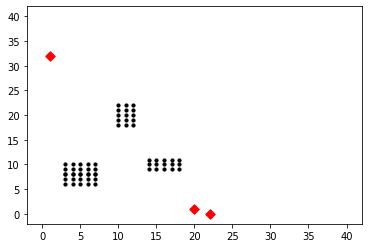

-------------------------------------------------------------------
Candidate 1
s(distance): 1 20
After movement of candidate:  [19, 0, 270, 0]
Pertubation done
-------------------------------------------------------------------
Candidate 2
s(distance): 2 32
After movement of candidate:  [0, 32, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 22
After movement of candidate:  [23, 0, 0, 0]
[[19, 1, 180, 0], [0, 32, 180, 0], [22, 0, 0, 0]]


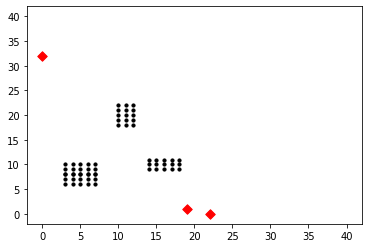

-------------------------------------------------------------------
Candidate 1
s(distance): 1 19
After movement of candidate:  [19, 1, 90, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 32
After movement of candidate:  [0, 31, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 23
After movement of candidate:  [23, 1, 90, 0]
[[19, 0, 90, 1], [0, 32, 270, 0], [23, 0, 0, 0]]


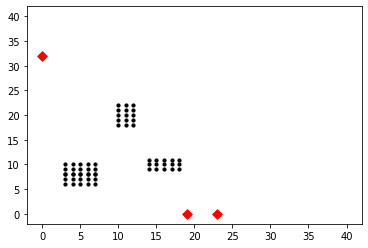

-------------------------------------------------------------------
Candidate 1
s(distance): 1 20
After movement of candidate:  [18, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 31
After movement of candidate:  [0, 30, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 24
After movement of candidate:  [22, 1, 180, 0]
[[19, 1, 90, 0], [0, 31, 270, 0], [23, 1, 90, 0]]


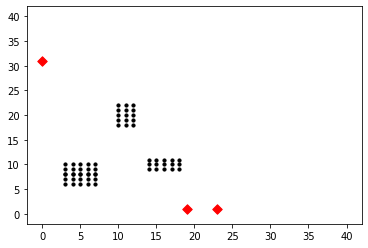

-------------------------------------------------------------------
Candidate 1
s(distance): 1 19
After movement of candidate:  [17, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 30
After movement of candidate:  [0, 29, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 23
After movement of candidate:  [22, 0, 270, 0]
Pertubation done
[[18, 1, 180, 0], [0, 30, 270, 0], [22, 1, 180, 0]]


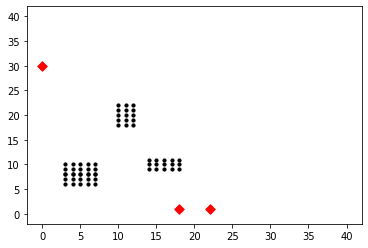

-------------------------------------------------------------------
Candidate 1
s(distance): 1 18
After movement of candidate:  [16, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 29
After movement of candidate:  [0, 28, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 22
After movement of candidate:  [22, 1, 90, 0]
[[17, 1, 180, 0], [0, 29, 270, 0], [22, 0, 90, 1]]


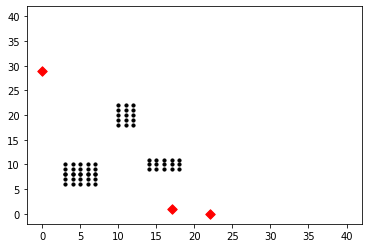

-------------------------------------------------------------------
Candidate 1
s(distance): 1 17
After movement of candidate:  [15, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 28
After movement of candidate:  [0, 27, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 23
After movement of candidate:  [21, 1, 180, 0]
[[16, 1, 180, 0], [0, 28, 270, 0], [22, 1, 90, 0]]


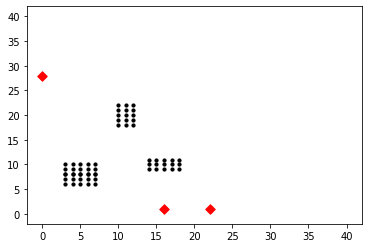

-------------------------------------------------------------------
Candidate 1
s(distance): 1 16
After movement of candidate:  [14, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 27
After movement of candidate:  [0, 26, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 22
After movement of candidate:  [20, 1, 180, 0]
[[15, 1, 180, 0], [0, 27, 270, 0], [21, 1, 180, 0]]


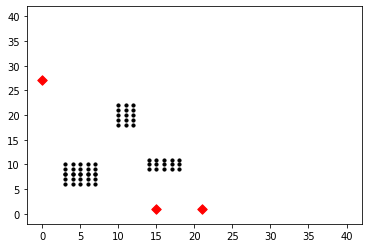

-------------------------------------------------------------------
Candidate 1
s(distance): 1 15
After movement of candidate:  [13, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 26
After movement of candidate:  [0, 25, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 21
After movement of candidate:  [19, 1, 180, 0]
[[14, 1, 180, 0], [0, 26, 270, 0], [20, 1, 180, 0]]


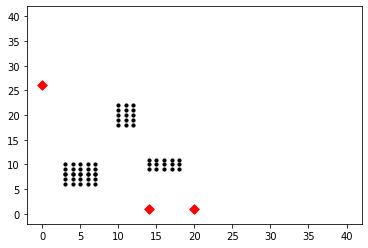

-------------------------------------------------------------------
Candidate 1
s(distance): 1 14
After movement of candidate:  [12, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 25
After movement of candidate:  [0, 24, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 20
After movement of candidate:  [18, 1, 180, 0]
[[13, 1, 180, 0], [0, 25, 270, 0], [19, 1, 180, 0]]


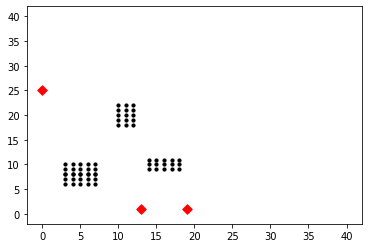

-------------------------------------------------------------------
Candidate 1
s(distance): 1 13
After movement of candidate:  [11, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 24
After movement of candidate:  [0, 23, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 19
After movement of candidate:  [17, 1, 180, 0]
[[12, 1, 180, 0], [0, 24, 270, 0], [18, 1, 180, 0]]


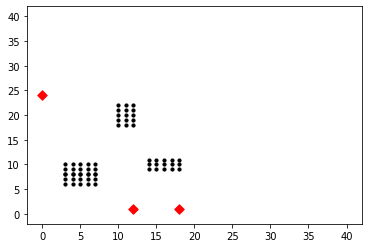

-------------------------------------------------------------------
Candidate 1
s(distance): 1 12
After movement of candidate:  [10, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 23
After movement of candidate:  [0, 22, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 18
After movement of candidate:  [16, 1, 180, 0]
[[11, 1, 180, 0], [0, 23, 270, 0], [17, 1, 180, 0]]


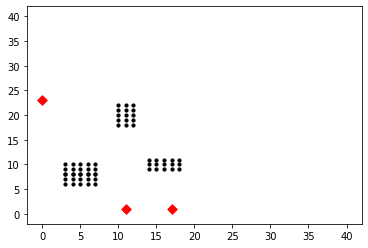

-------------------------------------------------------------------
Candidate 1
s(distance): 1 11
After movement of candidate:  [9, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 22
After movement of candidate:  [0, 21, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 17
After movement of candidate:  [15, 1, 180, 0]
[[10, 1, 180, 0], [0, 22, 270, 0], [16, 1, 180, 0]]


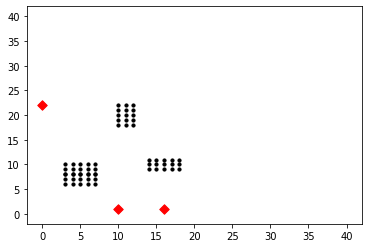

-------------------------------------------------------------------
Candidate 1
s(distance): 1 10
After movement of candidate:  [8, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 21
After movement of candidate:  [0, 20, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 16
After movement of candidate:  [14, 1, 180, 0]
[[9, 1, 180, 0], [0, 21, 270, 0], [15, 1, 180, 0]]


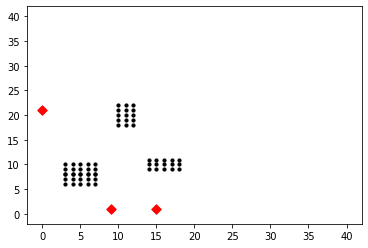

-------------------------------------------------------------------
Candidate 1
s(distance): 1 9
After movement of candidate:  [7, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 20
After movement of candidate:  [0, 19, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 15
After movement of candidate:  [13, 1, 180, 0]
[[8, 1, 180, 0], [0, 20, 270, 0], [14, 1, 180, 0]]


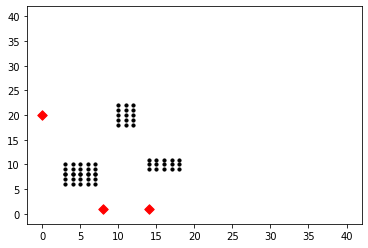

-------------------------------------------------------------------
Candidate 1
s(distance): 1 8
After movement of candidate:  [6, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 19
After movement of candidate:  [0, 18, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 14
After movement of candidate:  [12, 1, 180, 0]
[[7, 1, 180, 0], [0, 19, 270, 0], [13, 1, 180, 0]]


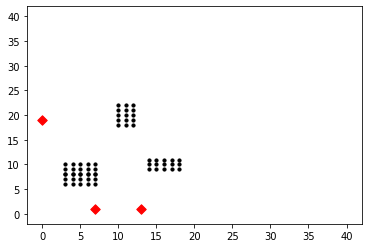

-------------------------------------------------------------------
Candidate 1
s(distance): 1 7
After movement of candidate:  [5, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 18
After movement of candidate:  [0, 17, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 13
After movement of candidate:  [11, 1, 180, 0]
[[6, 1, 180, 0], [0, 18, 270, 0], [12, 1, 180, 0]]


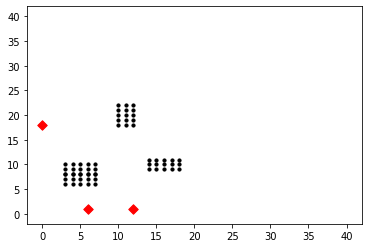

-------------------------------------------------------------------
Candidate 1
s(distance): 1 6
After movement of candidate:  [4, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 17
After movement of candidate:  [0, 16, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 12
After movement of candidate:  [10, 1, 180, 0]
[[5, 1, 180, 0], [0, 17, 270, 0], [11, 1, 180, 0]]


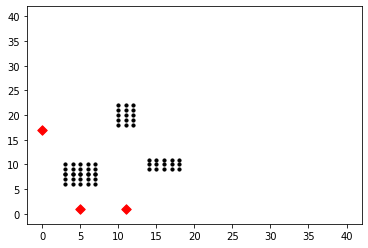

-------------------------------------------------------------------
Candidate 1
s(distance): 1 5
After movement of candidate:  [3, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 16
After movement of candidate:  [0, 15, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 11
After movement of candidate:  [9, 1, 180, 0]
[[4, 1, 180, 0], [0, 16, 270, 0], [10, 1, 180, 0]]


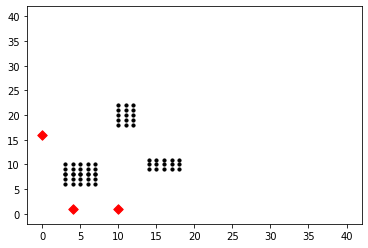

-------------------------------------------------------------------
Candidate 1
s(distance): 1 4
After movement of candidate:  [2, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 15
After movement of candidate:  [0, 14, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 10
After movement of candidate:  [8, 1, 180, 0]
[[3, 1, 180, 0], [0, 15, 270, 0], [9, 1, 180, 0]]


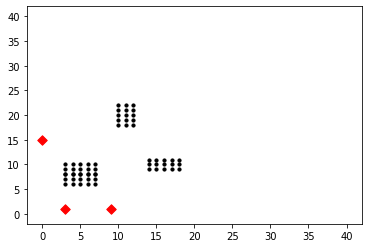

-------------------------------------------------------------------
Candidate 1
s(distance): 1 3
After movement of candidate:  [1, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 14
After movement of candidate:  [0, 13, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 9
After movement of candidate:  [7, 1, 180, 0]
[[2, 1, 180, 0], [0, 14, 270, 0], [8, 1, 180, 0]]


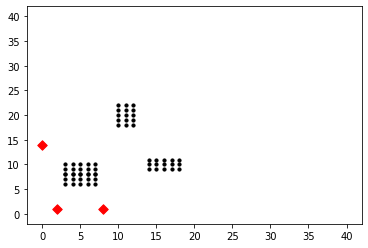

-------------------------------------------------------------------
Candidate 1
s(distance): 1 2
After movement of candidate:  [0, 1, 180, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 13
After movement of candidate:  [0, 12, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 8
After movement of candidate:  [6, 1, 180, 0]
[[1, 1, 180, 0], [0, 13, 270, 0], [7, 1, 180, 0]]


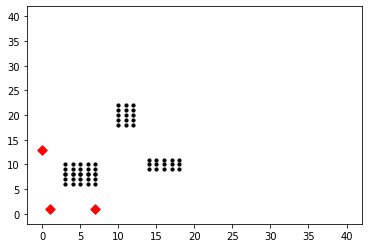

-------------------------------------------------------------------
Candidate 1
s(distance): 1 1
After movement of candidate:  [0, 1, 270, 0]
-------------------------------------------------------------------
Candidate 2
s(distance): 2 12
After movement of candidate:  [0, 11, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 7
After movement of candidate:  [5, 1, 180, 0]
[[0, 1, 180, 0], [0, 12, 270, 0], [6, 1, 180, 0]]


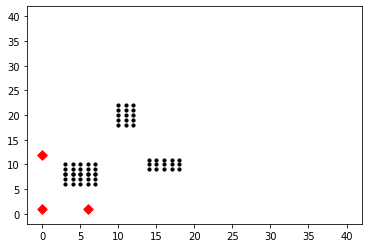

-------------------------------------------------------------------
Candidate 1
s(distance): 1 1
After movement of candidate:  [0, 0, 270, 0]
Cand 0 Reached the exit
-------------------------------------------------------------------
Candidate 2
s(distance): 2 11
After movement of candidate:  [0, 10, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 6
After movement of candidate:  [4, 1, 180, 0]
[[0, 1, 270, 0], [0, 11, 270, 0], [5, 1, 180, 0]]


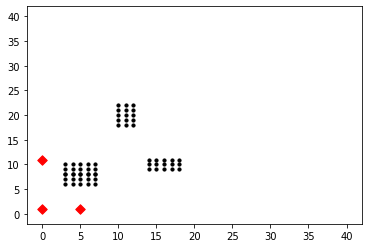

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 10
After movement of candidate:  [0, 9, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 5
After movement of candidate:  [3, 1, 180, 0]
[[0, 0, 270, 0], [0, 10, 270, 0], [4, 1, 180, 0]]


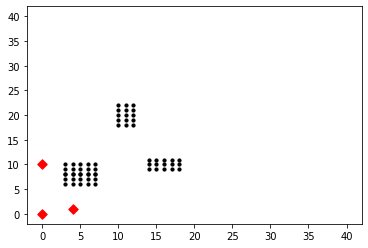

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 9
After movement of candidate:  [0, 8, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 4
After movement of candidate:  [2, 1, 180, 0]
[[0, 0, 270, 0], [0, 9, 270, 0], [3, 1, 180, 0]]


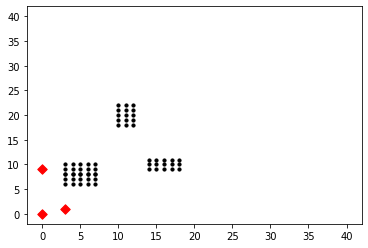

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 8
After movement of candidate:  [0, 7, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 3
After movement of candidate:  [1, 1, 180, 0]
[[0, 0, 270, 0], [0, 8, 270, 0], [2, 1, 180, 0]]


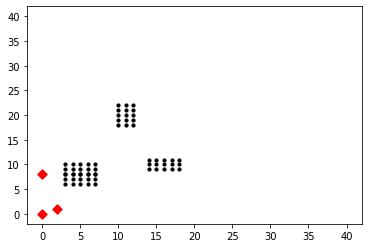

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 7
After movement of candidate:  [0, 6, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 2
After movement of candidate:  [0, 1, 180, 0]
[[0, 0, 270, 0], [0, 7, 270, 0], [1, 1, 180, 0]]


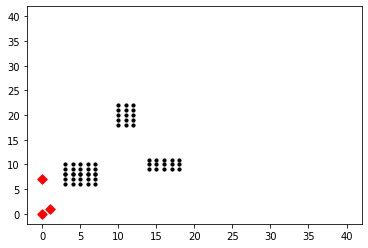

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 6
After movement of candidate:  [0, 5, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 1
After movement of candidate:  [0, 1, 270, 0]
[[0, 0, 270, 0], [0, 6, 270, 0], [0, 1, 180, 0]]


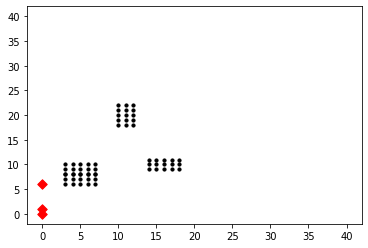

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 5
After movement of candidate:  [0, 4, 270, 0]
-------------------------------------------------------------------
Candidate 3
s(distance): 3 1
After movement of candidate:  [0, 0, 270, 0]
Cand 2 Reached the exit
[[0, 0, 270, 0], [0, 5, 270, 0], [0, 1, 270, 0]]


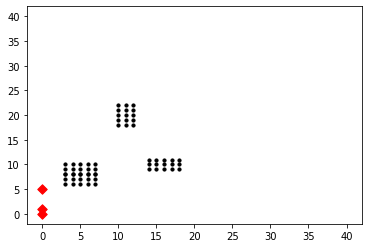

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 4
After movement of candidate:  [0, 3, 270, 0]
-------------------------------------------------------------------
Candidate 3
[[0, 0, 270, 0], [0, 4, 270, 0], [0, 0, 270, 0]]


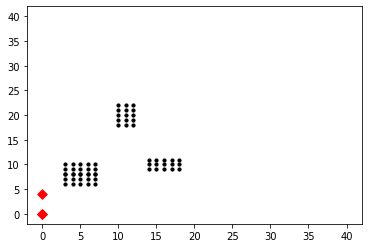

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 3
After movement of candidate:  [0, 2, 270, 0]
-------------------------------------------------------------------
Candidate 3
[[0, 0, 270, 0], [0, 3, 270, 0], [0, 0, 270, 0]]


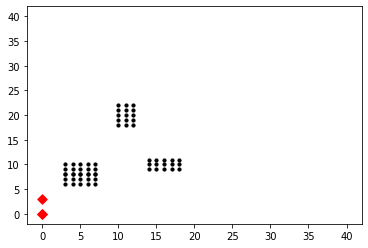

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 2
After movement of candidate:  [0, 1, 270, 0]
-------------------------------------------------------------------
Candidate 3
[[0, 0, 270, 0], [0, 2, 270, 0], [0, 0, 270, 0]]


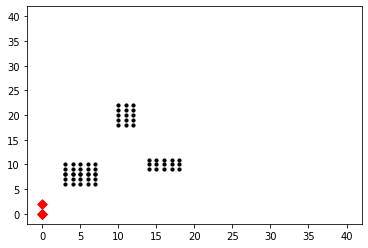

-------------------------------------------------------------------
Candidate 1
-------------------------------------------------------------------
Candidate 2
s(distance): 2 1
After movement of candidate:  [0, 0, 270, 0]
Cand 1 Reached the exit
-------------------------------------------------------------------
Candidate 3
[[0, 0, 270, 0], [0, 1, 270, 0], [0, 0, 270, 0]]


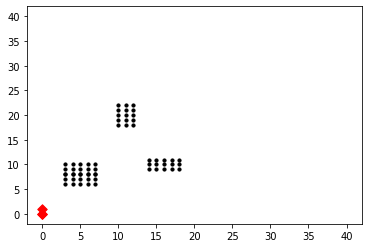

[[0, 0, 270, 0], [0, 0, 270, 0], [0, 0, 270, 0]]


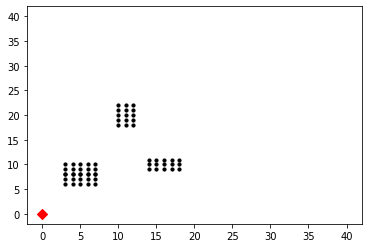

In [ ]:
cnt=0
obsChange =0
for n in range(100):
  if cnt<n_cand:
    for i in range(n_cand):
      print("-------------------------------------------------------------------")
      print("Candidate" , i+1)
      c=allBotPos[i]
      totalAllBotPos[i].append(c[:])

      if flag[i]==1:
        continue

      shieldPoints =getShieldPoints(bot_safe_bounding(c,length,breadth))

      # Function Call for Obstacle detection
      c,obsChange = exit_detect_Obstacle(c,shieldPoints,allObstaclePoints,obsChange)
      temp=c[0]+c[1]

      print("s(distance):" ,i+1 , temp)
      if smin[i] >= temp:
        smin[i] = temp
        c=botExitMovement(c,length,breadth)
      else:
        if obsChange==0:
          c[-1]=1
          c = angleMovement(c)
        c=botExitMovement(c,length,breadth)
      allBotS[i].append(temp)

      print("After movement of candidate: ", c)
      c=pertubation(c, totalAllBotPos[i])


      if(c[0]==0 and c[1] == 0):
        print("Cand", i ,"Reached the exit")

        flag[i]=1
        cnt=cnt+1

    prevpos = []
    for f in range(n_cand):
      prevpos.append(totalAllBotPos[f][n])
    displayBot(n_cand,xo,yo,prevpos,length,breadth)
displayBot(n_cand,xo,yo,allBotPos,length, breadth)